# Install necessary libraries

In [1]:
!pip install sails

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.4/103.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 35.2 MB/s eta 0:00:00
  Attempting uninstall: Pygments
    Found existing installation: Pygments 2.16.1
    Uninstalling Pygments-2.16.1:
      Successfully uninstalled Pygments-2.16.1
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib_metadata 8.4.0
    Uninstalling importlib_metadata-8.4.0:
      Successfully uninstalled importlib_metadata-8.4.0
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1
  Attempting uninstall: sphinx
    Found existing installation: Sphinx 5.0.2
    

In [2]:
pip install emd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 7.7 MB/s eta 0:00:00


In [3]:
!pip install neurodsp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.2 MB/s eta 0:00:00


# Import necessary libraries

In [4]:
## Initialzing and loading required libraries and subfunctions
import matplotlib.pyplot as plt
import scipy
from scipy import signal
from scipy.interpolate import griddata
import copy
import scipy.fft
import scipy.stats
import numpy as np
import emd as emd
import emd.sift as sift
import emd.spectra as spectra
import scipy.io as sio
import seaborn as sns
import pandas as pd
from scipy.signal import correlate
from scipy.stats import binned_statistic
from scipy.stats import pearsonr
from scipy.fft import fft
from scipy.spatial.distance import euclidean
from scipy.signal import spectrogram
from sklearn.preprocessing import normalize
import requests
from io import BytesIO
from scipy.io import loadmat
# Import simulation and plot code to create & visualize data
from neurodsp.sim import sim_combined
from neurodsp.plts import plot_time_series, plot_timefrequency
from neurodsp.utils import create_times
import sails
# Import function for Morlet Wavelets
from neurodsp.timefrequency.wavelets import compute_wavelet_transform

# Loading the Dataset

In [21]:
# url_hpc = "https://www.dropbox.com/scl/fo/fw45383wab5453dxlerhp/ADQRARNKMJgrCMQohsB6Q2w/HomeCageHC/OS_Ephys_RGS14_Rat9_378134_SD1_HC_29_04_2020/2020-04-29_14-49-49_Post_Trial5/HPC_100_CH9_0.continuous.mat?rlkey=dl2p0i4l4ezhp8l86c3fp824q&dl=1"

# response = requests.get(url_hpc)
# response.raise_for_status()

In [22]:
# state_response_url = 'https://www.dropbox.com/scl/fo/fw45383wab5453dxlerhp/AOxtQHRQcsGdG0bSifSJs8Y/HomeCageHC/OS_Ephys_RGS14_Rat9_378134_SD1_HC_29_04_2020/2020-04-29_14-49-49_Post_Trial5/2020-04-29_14-49-49_Post_Trial5-states.mat?rlkey=dl2p0i4l4ezhp8l86c3fp824q&dl=1'
# state_response = requests.get(state_response_url)
# state_response.raise_for_status()

In [5]:
url_hpc = "https://www.dropbox.com/scl/fo/dw1kw8acsna3qponvydwy/h/1/HC/post_trial5_2017-09-27_14-18-24/HPC_100_CH46.continuous.mat?rlkey=hs1o7bequxipnl1m8eii7eibu&dl=1"

response = requests.get(url_hpc)
response.raise_for_status()

In [6]:
state_response_url = 'https://www.dropbox.com/scl/fo/dw1kw8acsna3qponvydwy/h/1/HC/post_trial5_2017-09-27_14-18-24/post_trial5_2017-09-27_14-18-24-states.mat?rlkey=hs1o7bequxipnl1m8eii7eibu&dl=1'
state_response = requests.get(state_response_url)
state_response.raise_for_status()

In [7]:
HPC_1_HC_posttrial5 = scipy.io.loadmat(BytesIO(response.content))

In [8]:
posttrial5_states_ES2 = scipy.io.loadmat(BytesIO(state_response.content))

In [9]:
statesss = np.squeeze(posttrial5_states_ES2['states'])

In [10]:
len(statesss)/2500

4.1136

In [11]:
lfp = np.squeeze(HPC_1_HC_posttrial5['HPC'])
states = np.squeeze(posttrial5_states_ES2['states'])

In [12]:
np.unique(states)

array([0, 1, 3, 4, 5], dtype=uint8)

# Artifact Removal

In [13]:
import numpy as np

def findIntervalsA(booString):
    """
    This function takes a boolean string and returns the start and end indices of consecutive True values.

    Parameters:
        booString (numpy array) : A boolean numpy array where True values indicate the presence of a condition.

    Returns:
        numpy array : A 2D numpy array where each row represents an interval of consecutive True values in the input.
        The first column is the start index and the second column is the end index of the interval.

    Note:
    The function assumes that the input is a 1D boolean numpy array. If the input does not meet this assumption, the function may not work as expected.
    """
    booString = booString.reshape((1, len(booString)))

    starts = np.where(np.diff((np.concatenate(([False], booString[0]), axis=0)).astype(int)) > 0)[0]
    ends = np.where(np.diff((np.concatenate((booString[0], [False]), axis=0)).astype(int))< 0)[0]

    intervals = np.vstack((starts, ends)).T
    return intervals

def ConsolidateIntervalsFast(intervals, strict='off', epsilon=0):
    """
    Merge together the intervals that are overlapping.

    Parameters:
        intervals (list of tuples): List of intervals (e.g., [(start1, end1), (start2, end2), ...]).
        strict (str, optional): Intervals with common bounds are consolidated ('off') or kept separate ('on').
            Default is 'off'.
        epsilon (float, optional): Intervals with close enough bounds (distance lesser than epsilon) are also
            consolidated. Default is 0.

    Returns:
        list of tuples: Consolidated intervals.
        list of int: For each original interval, the index of the consolidated
            interval to which it belongs (empty intervals yield NaN).

    Note:
        Assumes the intervals are sorted in time and that no interval is completely contained within another.
    """
    if len(intervals) == 0:
        raise ValueError("Input list of intervals cannot be empty.")

    # Get difference between two consecutive intervals
    vector = np.array(intervals).flatten()
    d = np.diff(vector)
    d = d[1::2]

    # Define problematic spots
    if strict == 'on':
        problematic = d < epsilon
    else:
        problematic = d <= epsilon
    # Leave function if intervals don't need consolidating
    if not np.any(problematic):
        consolidated = intervals
        return consolidated

    # Mark already consolidated intervals
    problematic_etendu = np.concatenate(([False], problematic, [False]))
    done = [intervals[i] for i in range(len(intervals)) if not problematic_etendu[i] and not problematic_etendu[i+1]]


    # Initialize consolidated intervals and target list
    indices = toIntervals(problematic)
    for i in range(len(indices)):
      indices[i] = (indices[i][0], indices[i][1] + 1)
    fixed= [ (x, y) for x, y in zip([intervals[int(i) - 1][0] for i, _ in indices], [intervals[int(i) - 1][1] for _, i in indices]) ]
    #fixed = [tuple([intervals[int(i) - 1][0] for i, _ in indices], [intervals[int(i) - 1][1] for _, i in indices])]
    # Concatenate done and fixed vertically
    if done != [] and fixed != []:
      consolidated = np.vstack((done, fixed))
    elif done == []:
       consolidated = [list(el) for el in fixed]
    else:
       consolidated = [list(el) for el in done]
    # Sort the rows of consolidated based on the first column
    consolidated = np.array(consolidated)

    # Sort the rows of consolidated based on the first column
    consolidated = consolidated[consolidated[:, 0].argsort()]
    consolidated = [tuple(row) for row in consolidated]
    target = [None] * len(intervals)
    # Initialize variables for the current interval
    current_start, current_end = intervals[0]
    current_target = 1

    # Convert target indices to 1-based indexing
    target = [t + 1 if t is not None else None for t in target]
    # Return the consolidated intervals
    return consolidated

def toIntervals(x, in_ = None):
    """
    Convert logical vector to a list of intervals.

    Parameters:
        x (list) : values, e.g. timestamps
        in_ (boolean list, optional) : boolean list of the same length as x;
    Returns:
        list : A list of tuples where each tuple represents an interval. Each tuple contains two elements: the start and end of the interval.

    Note:
    _in  can also be omitted, in which case x needs to be a boolean list
    and the intervals are defined in terms of indices in the logical vector.
    """
    if len(x) == 0:
        raise ValueError('Incorrect number of parameters .')

    if in_ is None:
        in_ = np.array(in_)
        in_ = x
        x = np.linspace(1, len(x) + 1, len(x) + 1)
    else:
        in_ = np.array(in_)
        if not np.all(np.isfinite(x)):
            raise ValueError('Incorrect x values.')

    if in_[-1] == 1:
        in_ = np.append(in_, 0)

    din = np.diff(np.concatenate(([0], in_)))
    start = np.where(din == 1)[0]
    stop = np.where(din == -1)[0]

    ivs = np.column_stack((start, stop - 1))
    if len(x) > 0:
        ivs = x[ivs]

    return ivs

def InIntervals(values, intervals):
    """
    Test which values fall in a list of sorted intervals.

    Parameters:
        values (list): Sorted list of values to test.
        intervals (list of tuples): Sorted list of (start, stop) pairs representing the intervals.

    Returns:
        list: Boolean values indicating whether each value is in an interval.
    """
    result = []
    interval_index = 0

    for value in values:
        while interval_index < len(intervals) and intervals[interval_index][1] < value:
            interval_index += 1

        if interval_index < len(intervals) and intervals[interval_index][0] <= value <= intervals[interval_index][1]:
            result.append(True)
        else:
            result.append(False)

    return result

def removeArtefacts(lfp_sig, originalFreq, amp_thresh, time_win_thresh):
    """
    Removes artefacts from the LFP signal.

    Parameters:
        lfp_sig (numpy.ndarray): The LFP signal.
        originalFreq (float): The sampling frequency.
        amp_thresh (tuple): The amplitude thresholds for detecting artefacts.
                            The first one corresponds to the threshold for the absolute value of the z-scored signal.
                            The second one corresponds to the threshold to the absolute difference between a value and its predecessor of the z-scored signal.
        time_win_thresh (tuple): The time windows that will be set to zero before and after the detected artefacts.
                                 The first one corresponds to the window for the absolute value of the z-scored signal.
                                 The second one corresponds to the window for the absolute difference between a value and its predecessor of the z-scored signal.
    Returns:
        numpy.ndarray: The corrected LFP signal.
        numpy.ndarray: The indices of the artefacts.
        numpy.ndarray: The corresponding time.

    Note :
        This function only set to zero the detected artefacts.
    """
    time = np.linspace(0, len(lfp_sig)/originalFreq, len(lfp_sig))
    lfp_sig = np.array(lfp_sig)
    # Parameters
    threshold1 = amp_thresh[0]  # in sigmas deviating from the mean
    aroundArtefact1 = time_win_thresh[0]  # 2, Big and long artefacts
    threshold2 = amp_thresh[1]  # for derivative of z-scored signal
    aroundArtefact2 = time_win_thresh[1]  # 0.1 Very fast fluctuations (short time scale)

    # Performing the computations
    timeValues = time
    sig_values = lfp_sig.copy()
    z_sig = (sig_values - np.mean(sig_values)) / np.std(sig_values)
    z_sig = np.ravel(z_sig)
    diff_sig = np.concatenate((np.diff(z_sig),[0]), axis=0)
    artefactInds = np.zeros(len(sig_values), dtype=bool)
    findIntervalsA(np.abs(z_sig)>threshold1)
    # First we detect the large global artefacts
    artefactInterval = timeValues[findIntervalsA(np.abs(z_sig)>threshold1)]
    #if np.size(artefactInterval) == 2:
      #artefactInterval = np.ravel(artefactInterval)
    if artefactInterval.size != 0:
      array_artefactInterval= [ (x, y) for x, y in zip(artefactInterval[:,0]-aroundArtefact1, artefactInterval[:,1]+aroundArtefact1) ]
      artefactInterval = ConsolidateIntervalsFast(array_artefactInterval);
      artefactInds = InIntervals(timeValues, artefactInterval)
    else:
      artefactInterval = np.zeros((0, 2))

    # Find noise using the derivative of the zscored signal (2)
    noisyInterval = timeValues[findIntervalsA(np.abs(diff_sig)>threshold2)]
    #if np.size(noisyInterval) == 2:
      #noisyInterval = np.ravel(noisyInterval)
    if noisyInterval.size != 0:
      array_noisyInterval= [ (x, y) for x, y in zip(noisyInterval[:,0]-aroundArtefact2, noisyInterval[:,1]+aroundArtefact2) ]
      noisyInterval = ConsolidateIntervalsFast(array_noisyInterval);
      artefactInds = np.logical_or(artefactInds, InIntervals(timeValues, noisyInterval))
    else:
      noisyInterval = np.zeros((0, 2))

    artefactInds = np.array(artefactInds)
    sig_values = np.ravel(sig_values)
    sig_values[artefactInds] = 0

    return sig_values, artefactInds, timeValues

def artefact_epochs(artefactsIndices, window_length, threshold = 0):
    """
    Get the indices of the epochs containing artefacts

    Parameters:
        artefactsIndices (list): the indices of the artefacts in the raw data.
        window_length (int) : the length of an epoch
        threshold (float, optional) : percentage of artefact necessary for an epoch to be detected as an artefact.

    Returns:
        numpy.ndarray : the indices of the epochs containing a percetage of artefacts greater than the threshold.
    """
    artefactsCountEpochs = artefactsIndices[:len(artefactsIndices)//window_length * window_length].reshape(-1, window_length)
    artefactsCountEpochs = [np.count_nonzero(el) for el in artefactsCountEpochs]
    art_percentage_per_epoch = np.ravel([(el/(window_length))*100  for el in artefactsCountEpochs])

    arte_indices = []
    for i, el in enumerate(art_percentage_per_epoch):
        if el > threshold:
            arte_indices.append(i)
    arte_indices = np.ravel(arte_indices)
    return arte_indices

In [14]:
hpc_clean, hpcNoisyIdx, timeValues = removeArtefacts(lfp, 1000, [4, 8], [1, 0.1])

In [15]:
lfp = hpc_clean

# Start Analysis

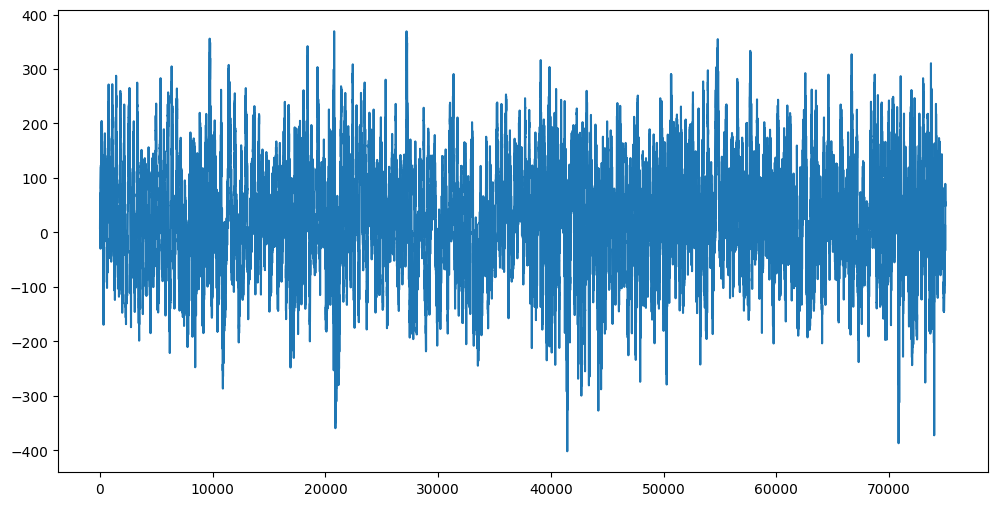

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(lfp[50*2500:80*2500])

In [17]:
len(states) / 2500

4.1136

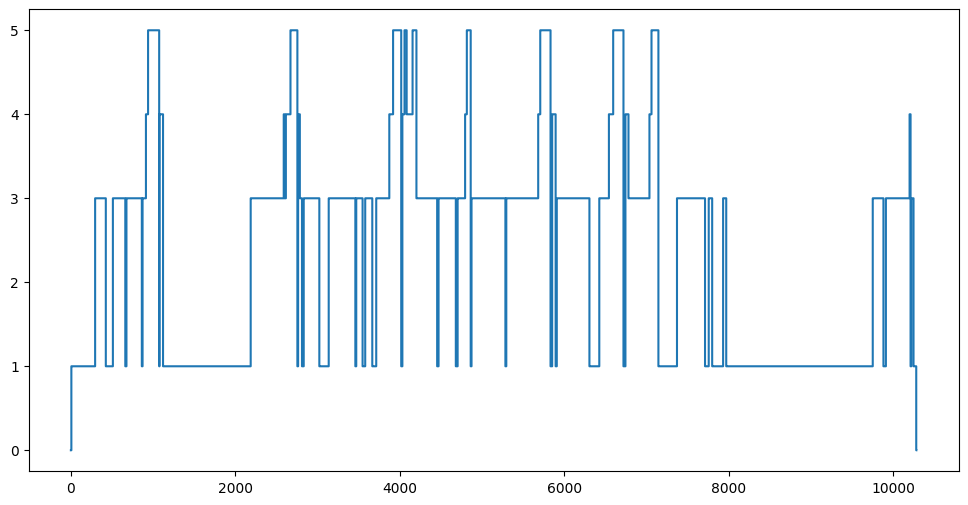

In [18]:
plt.figure(figsize=(12, 6))
time = np.arange(len(states))
plt.step(time, states)

In [19]:
def get_rem_states(states, sample_rate):
    """
    Extract consecutive REM (Rapid Eye Movement) sleep states from a binary sleep state vector.

    Parameters:
    states (numpy.ndarray): A sleep state vector where 5 represents REM sleep and other values indicate non-REM.
    sample_rate (int or float): The sampling rate of the data.

    Returns:
    numpy.ndarray: An array of consecutive REM sleep state intervals in seconds, represented as (start, end) pairs.

    Notes:
    - This function processes a binary sleep state vector and identifies consecutive REM sleep intervals.
    - It calculates the start and end times of each REM state interval based on the provided sample rate.
    - The resulting intervals are returned as a numpy array of (start, end) pairs in seconds.
    """
    states = np.squeeze(states)
    rem_state_indices = np.where(states == 5)[0]
    rem_state_changes = np.diff(rem_state_indices)
    split_indices = np.where(rem_state_changes != 1)[0] + 1
    split_indices = np.concatenate(([0], split_indices, [len(rem_state_indices)]))
    consecutive_rem_states = np.empty((len(split_indices) - 1, 2))
    for i, (start, end) in enumerate(zip(split_indices, split_indices[1:])):
        start = rem_state_indices[start] * int(sample_rate)
        end = rem_state_indices[end - 1] * int(sample_rate)
        consecutive_rem_states[i] = np.array([start, end])
    consecutive_rem_states = np.array(consecutive_rem_states)
    null_states_mask = np.squeeze(np.diff(consecutive_rem_states) > 0)
    consecutive_rem_states = consecutive_rem_states[null_states_mask]
    return consecutive_rem_states

In [20]:
s_rate= 2500
rem_states=get_rem_states(states, s_rate).astype(int)

for i,rem in enumerate(rem_states,start=1):
  print(f'REM {i} is from {rem[0]/s_rate} seconds (@ index {rem[0]}) to {rem[1]/s_rate} seconds (@ index {rem[1]})')

REM 1 is from 940.0 seconds (@ index 2350000) to 1074.0 seconds (@ index 2685000)
REM 2 is from 2672.0 seconds (@ index 6680000) to 2755.0 seconds (@ index 6887500)
REM 3 is from 3920.0 seconds (@ index 9800000) to 4018.0 seconds (@ index 10045000)
REM 4 is from 4059.0 seconds (@ index 10147500) to 4084.0 seconds (@ index 10210000)
REM 5 is from 4157.0 seconds (@ index 10392500) to 4203.0 seconds (@ index 10507500)
REM 6 is from 4817.0 seconds (@ index 12042500) to 4863.0 seconds (@ index 12157500)
REM 7 is from 5710.0 seconds (@ index 14275000) to 5834.0 seconds (@ index 14585000)
REM 8 is from 6597.0 seconds (@ index 16492500) to 6721.0 seconds (@ index 16802500)
REM 9 is from 7063.0 seconds (@ index 17657500) to 7146.0 seconds (@ index 17865000)


In [21]:
first_rem=lfp[rem_states[0,0]:rem_states[0,1]]

In [22]:
first_rem.shape

(335000,)

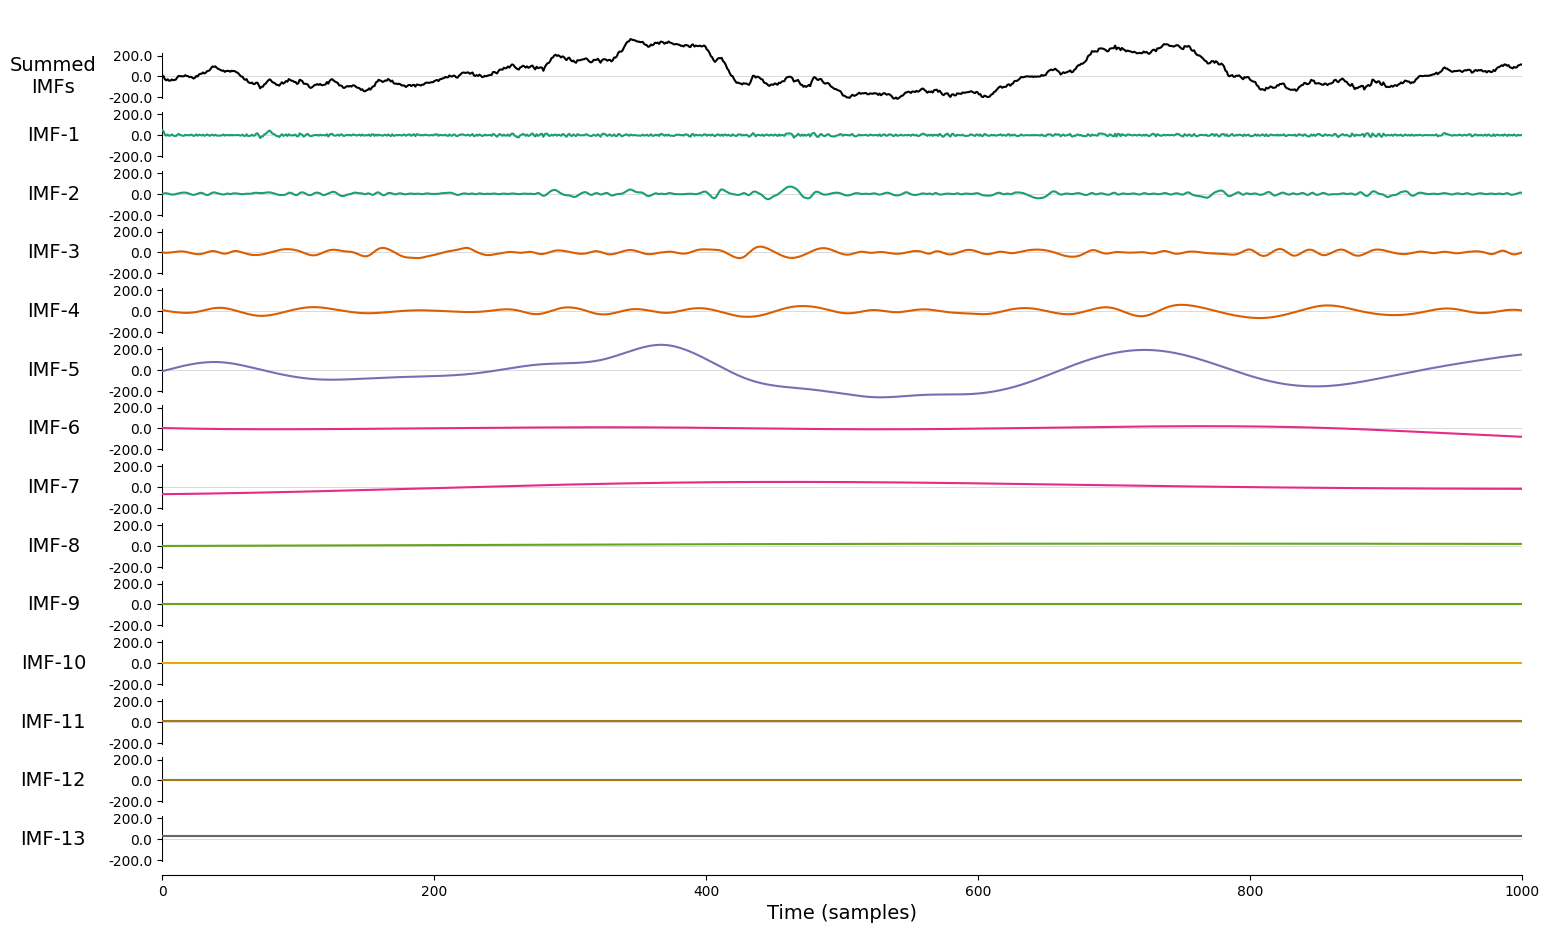

In [23]:
#@title ### Normal Sift

sift=emd.sift.sift(first_rem)
siftfig=emd.plotting.plot_imfs(sift[:1000,:]).get_figure()

In [47]:
emd.plotting

<module 'emd.plotting' from '/usr/local/lib/python3.10/dist-packages/emd/plotting.py'>

Ensemble Sift


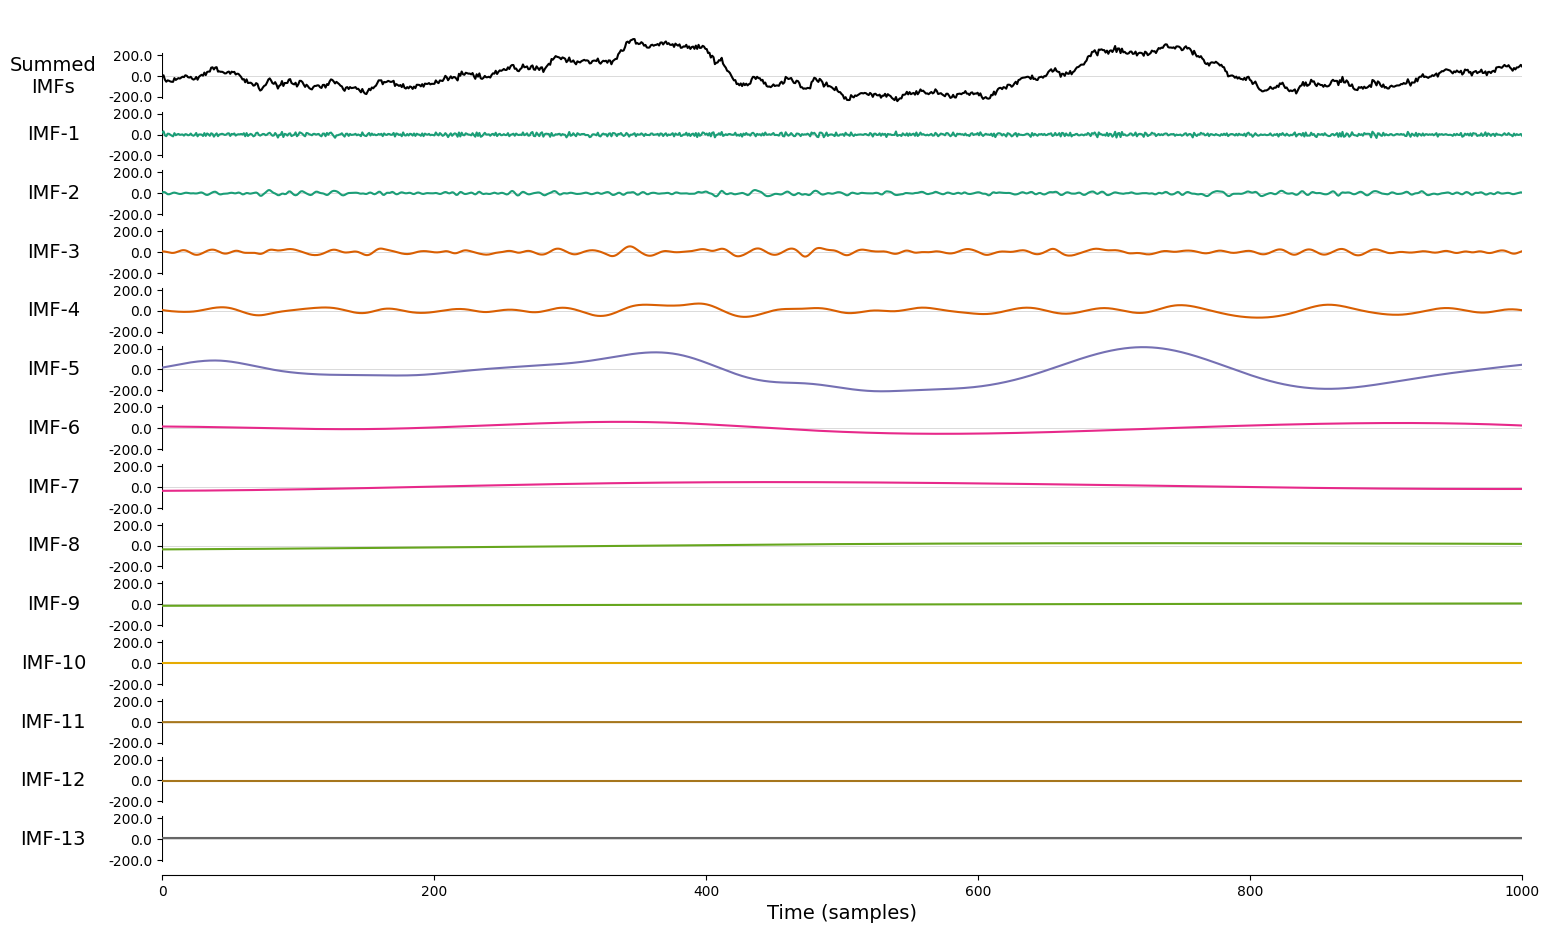

In [24]:
#@title ### Ensemble Sift
print('Ensemble Sift')

ensemble=emd.sift.ensemble_sift(first_rem)
ensemblefig=emd.plotting.plot_imfs(ensemble[:2500,:]).get_figure()

In [31]:
emd.sift.complete_ensemble_sift

<function emd.sift.complete_ensemble_sift(X, nensembles=4, ensemble_noise=0.2, nprocesses=1, noise_seed=None, sift_thresh=1e-08, energy_thresh=50, rilling_thresh=None, max_imfs=None, verbose=None, imf_opts=None, envelope_opts=None, extrema_opts=None)>

In [32]:
first_rem.shape

(335000,)

Complete Ensemble Sift


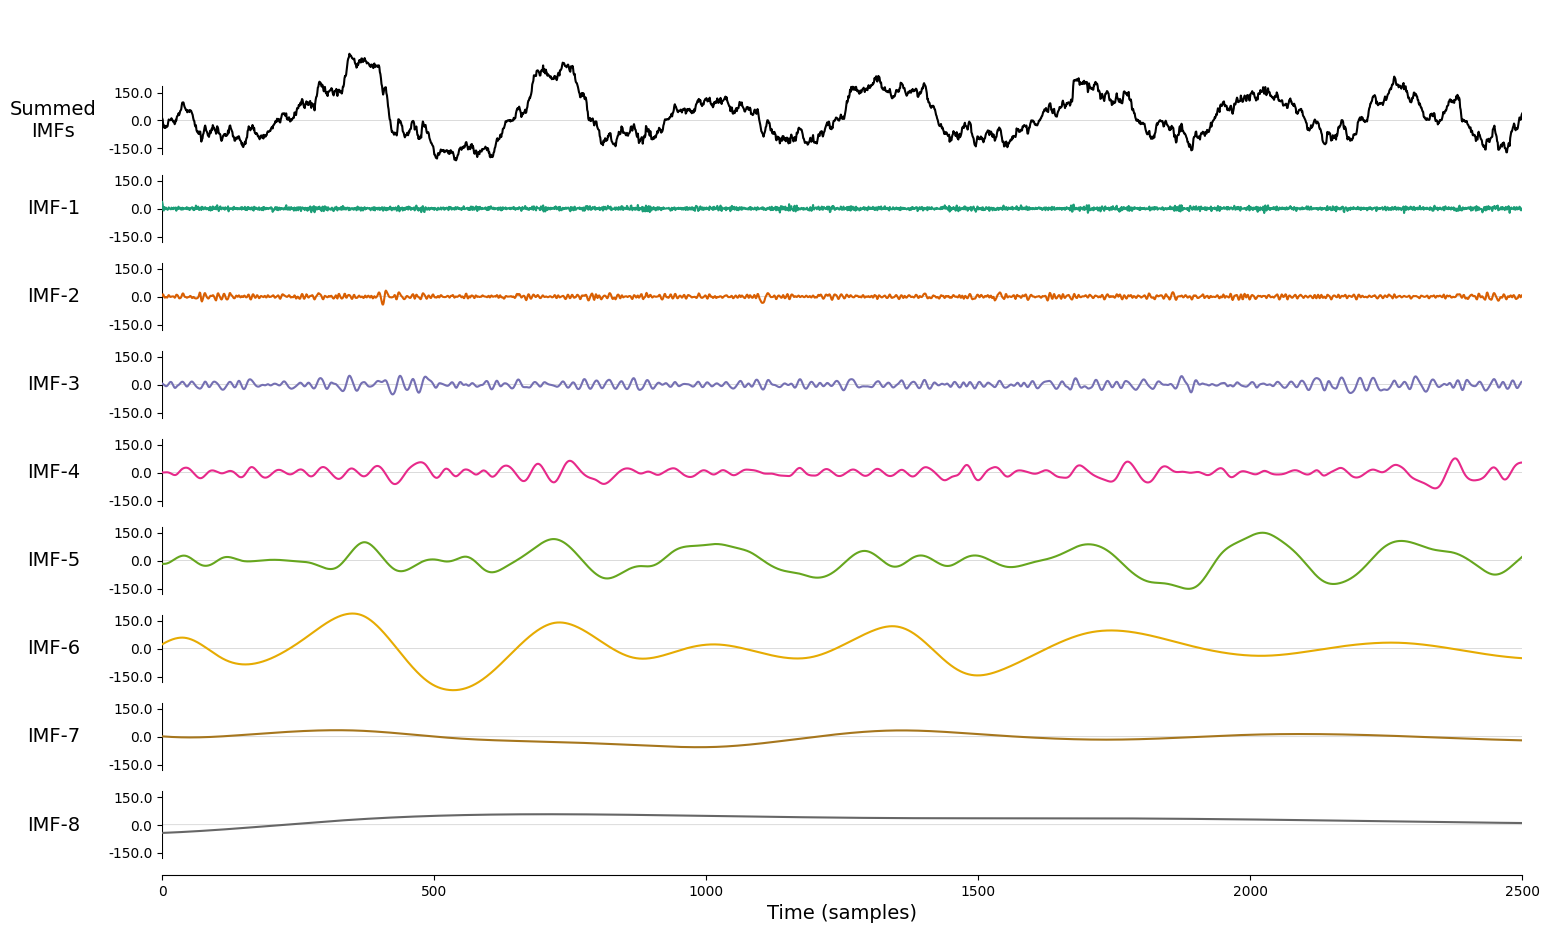

In [25]:
#@title ### Complete Ensemble Sift
print('Complete Ensemble Sift')

censemble=emd.sift.complete_ensemble_sift(first_rem, max_imfs=6)
censemblefig=emd.plotting.plot_imfs(censemble[:2500,:]).get_figure()

Masked Sift Zero Cross Setting


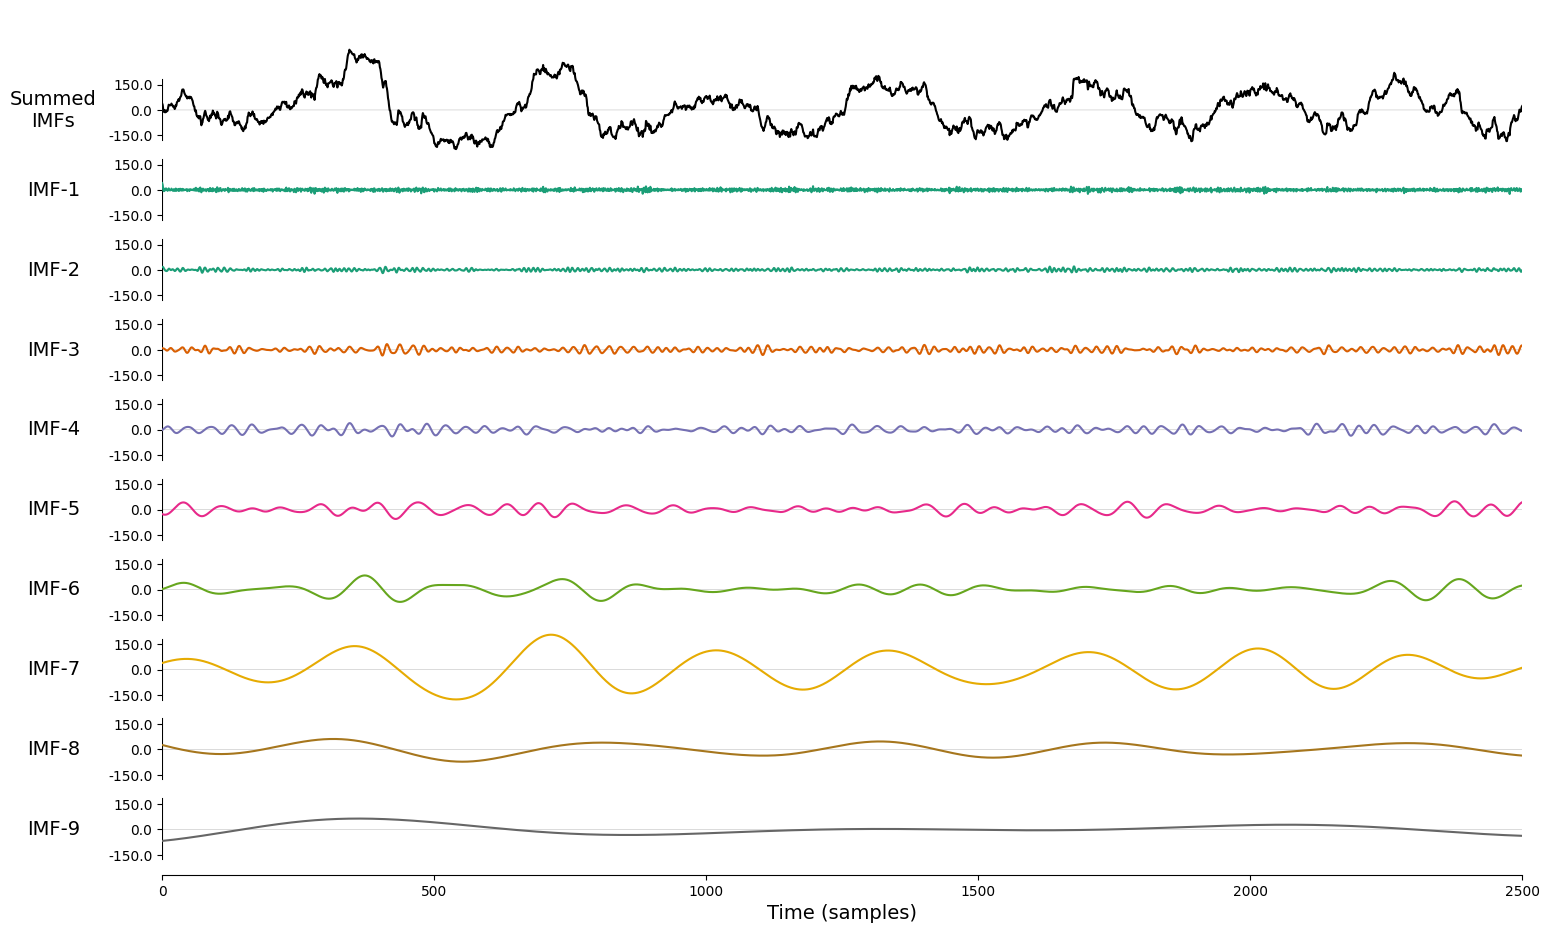

In [26]:
#@title ### Masked Sift Zero Cross Setting
print('Masked Sift Zero Cross Setting')

maskzc=emd.sift.mask_sift(first_rem,mask_freqs='zc',ret_mask_freq='True')
maskzcfig=emd.plotting.plot_imfs(maskzc[0][:2500,:]).get_figure()

Masked Sift Instantaneous Frequency Setting


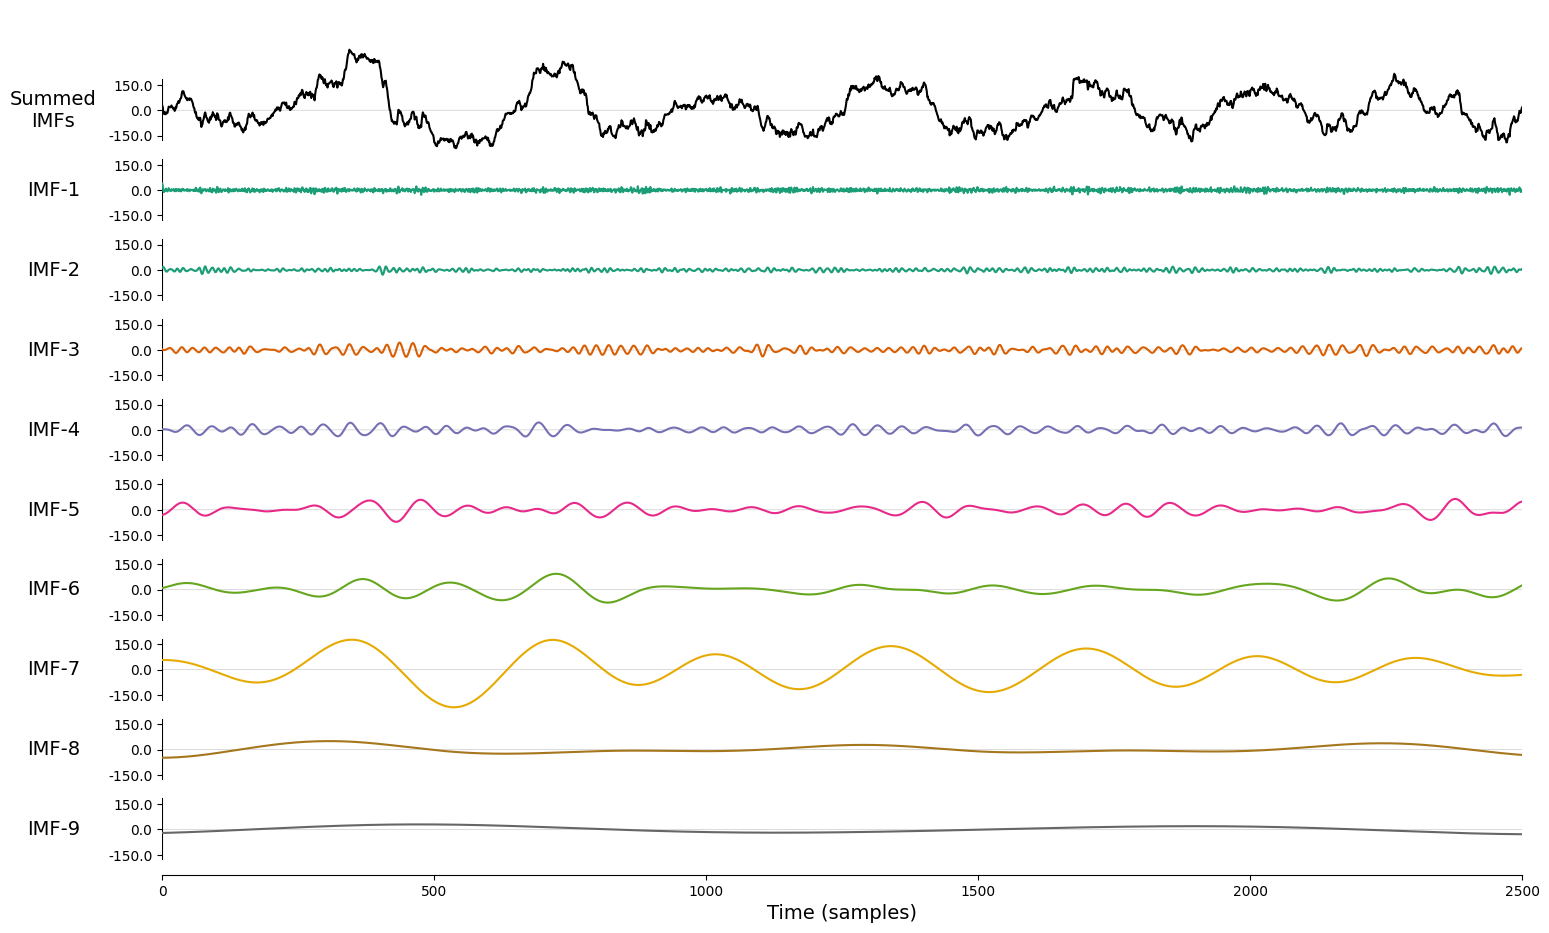

In [27]:
#@title ### Masked Sift Instantaneous Frequency Setting
print('Masked Sift Instantaneous Frequency Setting')

maskif=emd.sift.mask_sift(first_rem,mask_freqs='if',ret_mask_freq='True')
maskiffig=emd.plotting.plot_imfs(maskif[0][:2500,:]).get_figure()

Iterated Masked Sift Zero Cross Setting


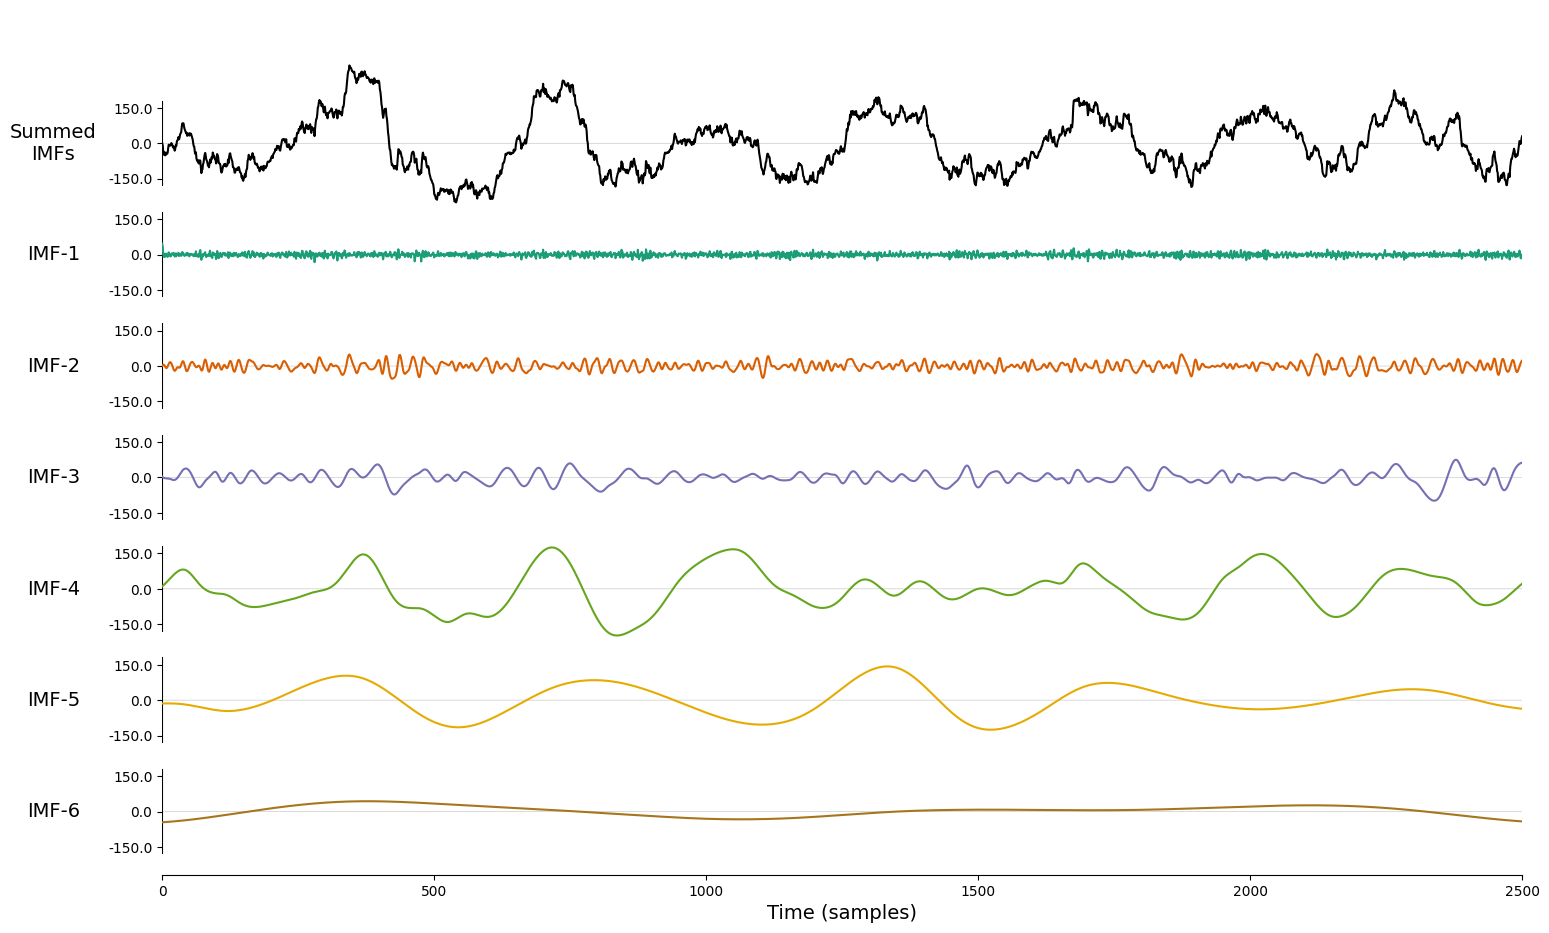

In [28]:
#@title ### Iterated Masked Sift Zero Cross Setting
print('Iterated Masked Sift Zero Cross Setting')

imask=emd.sift.iterated_mask_sift(first_rem,mask_0='zc',sample_rate=s_rate,ret_mask_freq='True')
imaskzcfig=emd.plotting.plot_imfs(imask[0][:2500,:]).get_figure()

# Theta signal extraction from **I**ntrisic **M**ode **F**unction(s) (IMF)

In order to extract theta signals, the raw signal is a summation of signal sources of various frequencies. Since we are targeting for theta oscillations we're mostly looking for signal behavior in the 5-12 Hz range.

Below is a demonstration of  signal behavior in the theta range using a bandpass filter

In [29]:
# Create the time vector

time=len(first_rem)/s_rate
seconds=np.linspace(0,time,len(first_rem))

In [30]:
filtered_theta = []
Wlo = [5,12]
Whi=[60,80]# Set the passband [2-10] Hz,
n = 50;                            # ... and filter order,
                                    # ... build the bandpass filter,

for ii in range(len(rem_states)):
  rem_seg = lfp[rem_states[ii,0]:rem_states[ii,1]]
  a = signal.firwin(n, Wlo, fs=s_rate, pass_zero=False, window='hamming');
  b = signal.firwin(n, Whi, fs=s_rate, pass_zero=False, window='hamming');
  Vlo = signal.filtfilt(a, 1, rem_seg);   # ... and apply it to the data.
  #Vhi= signal.filtfilt(b, 1, rem_seg);
  filtered_theta.append(Vlo)
# VloX=scipy.fft.fft(Vlo)
# VhiX=scipy.fft.fft(Vhi)
# VloXA=2*abs(VloX)/len(first_rem)
# VhiXA=2*abs(VhiX)/len(first_rem)

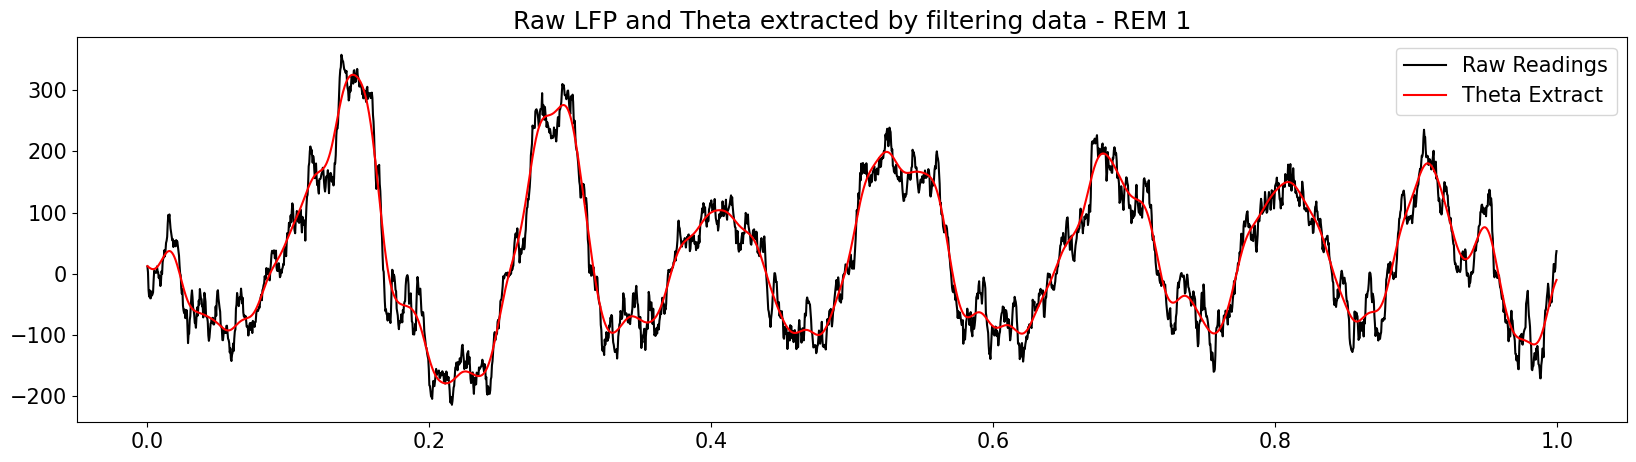

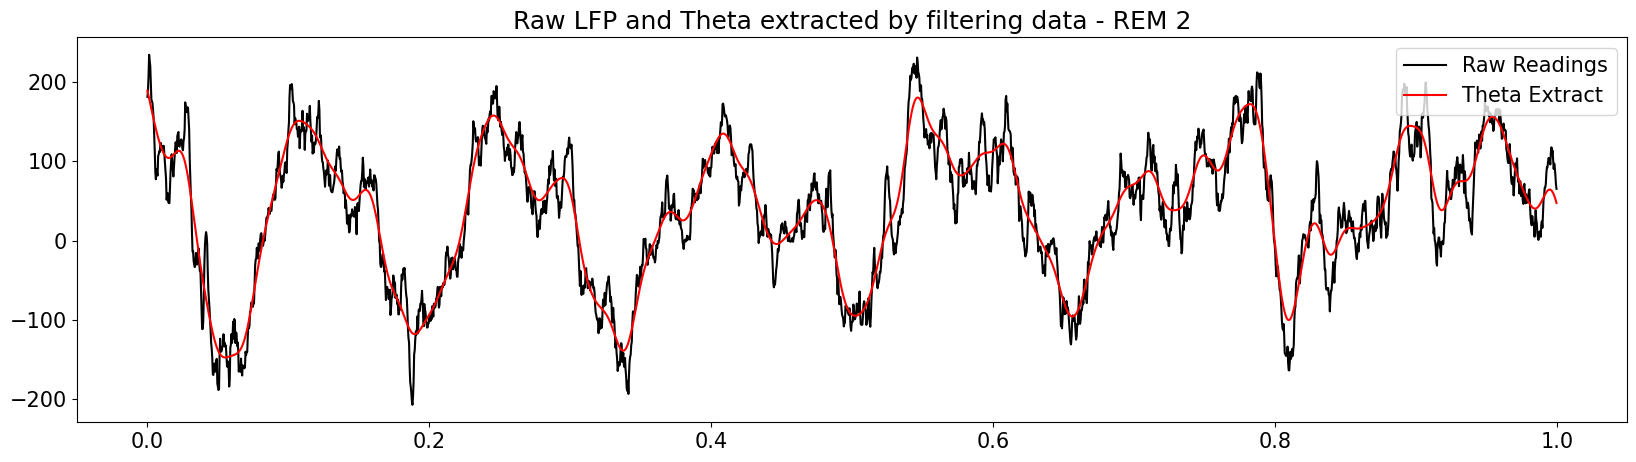

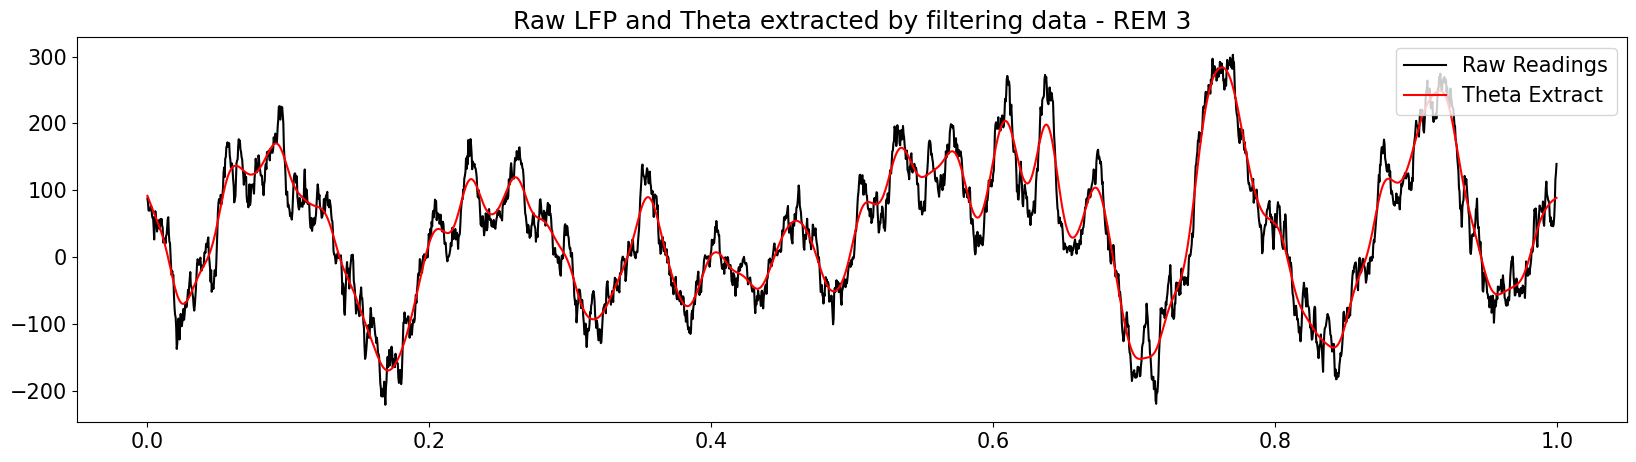

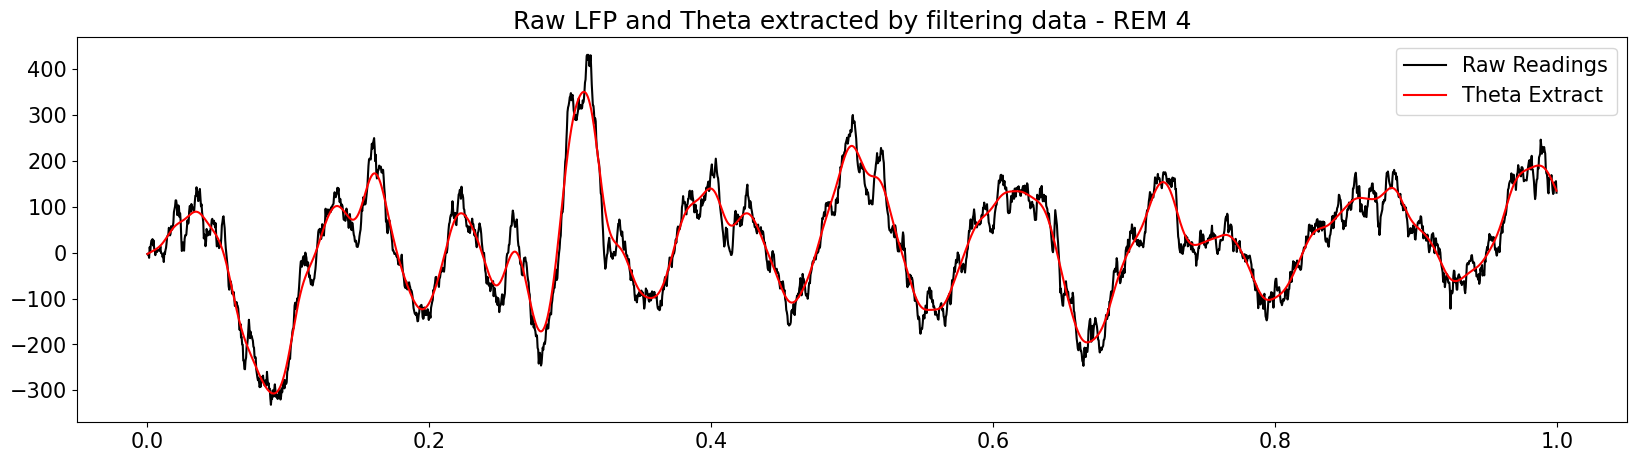

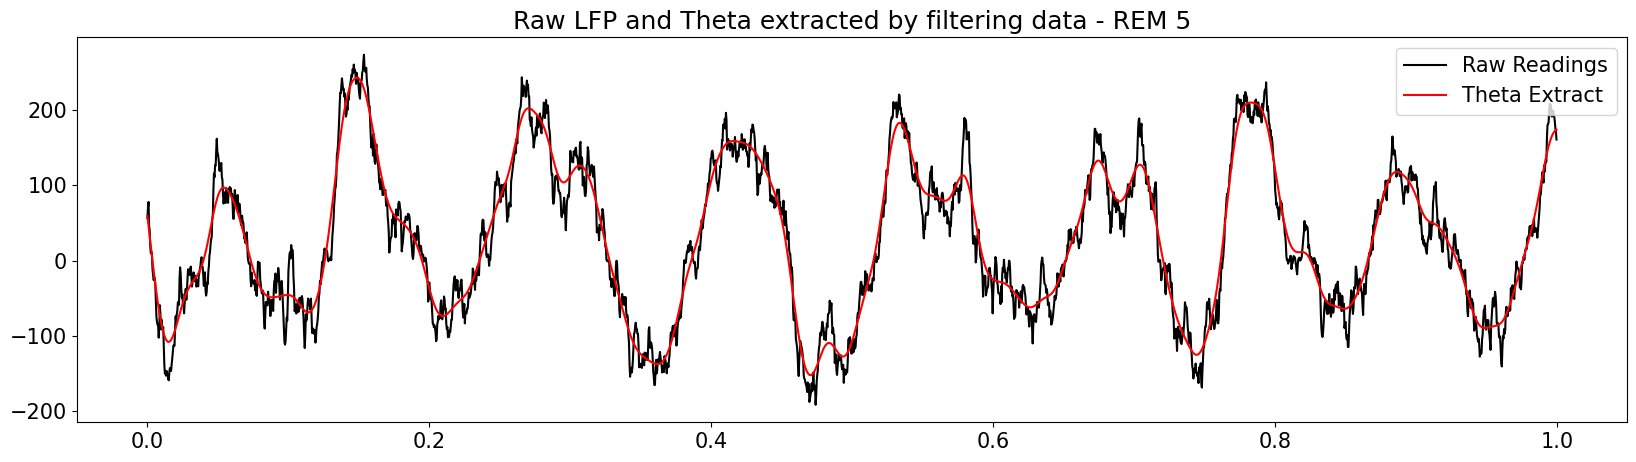

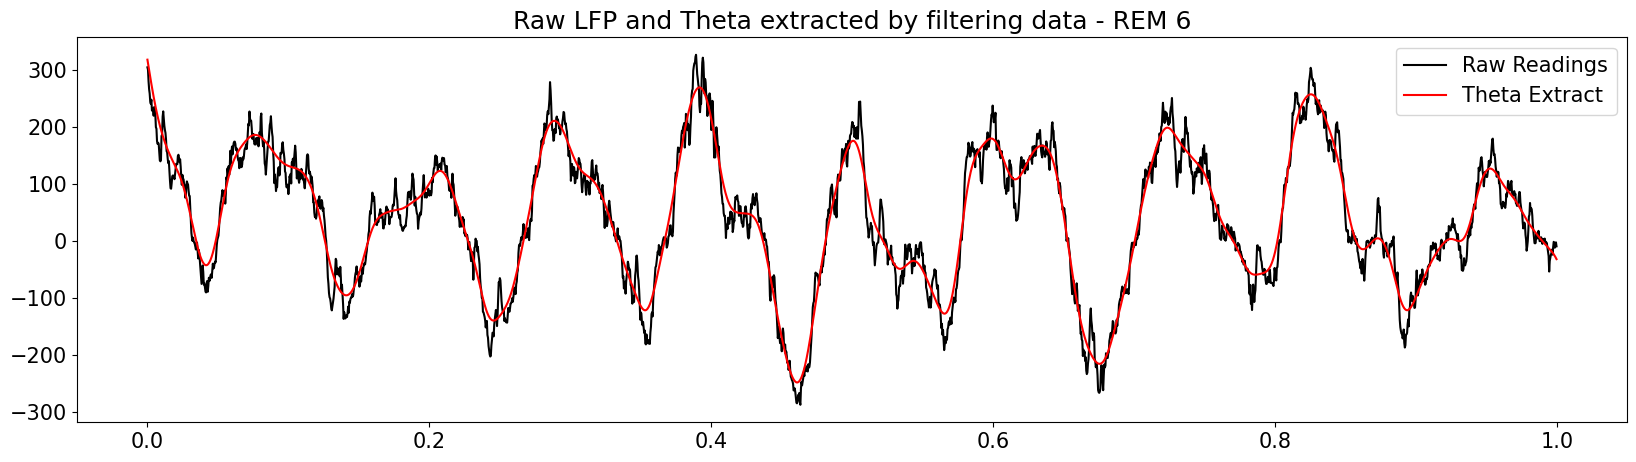

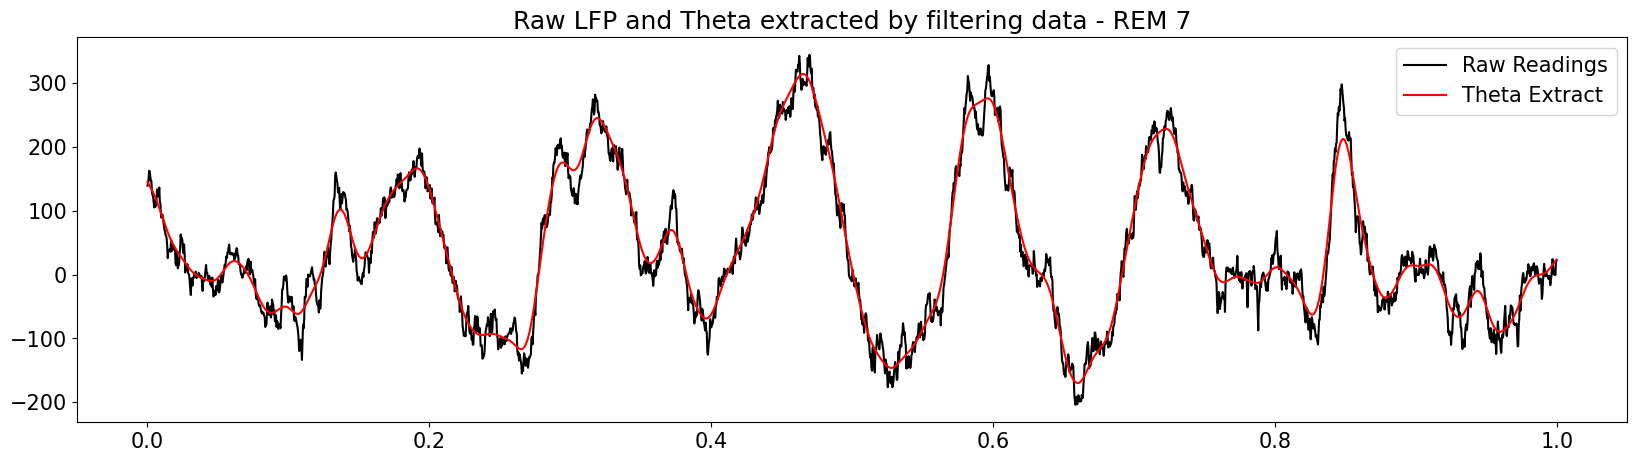

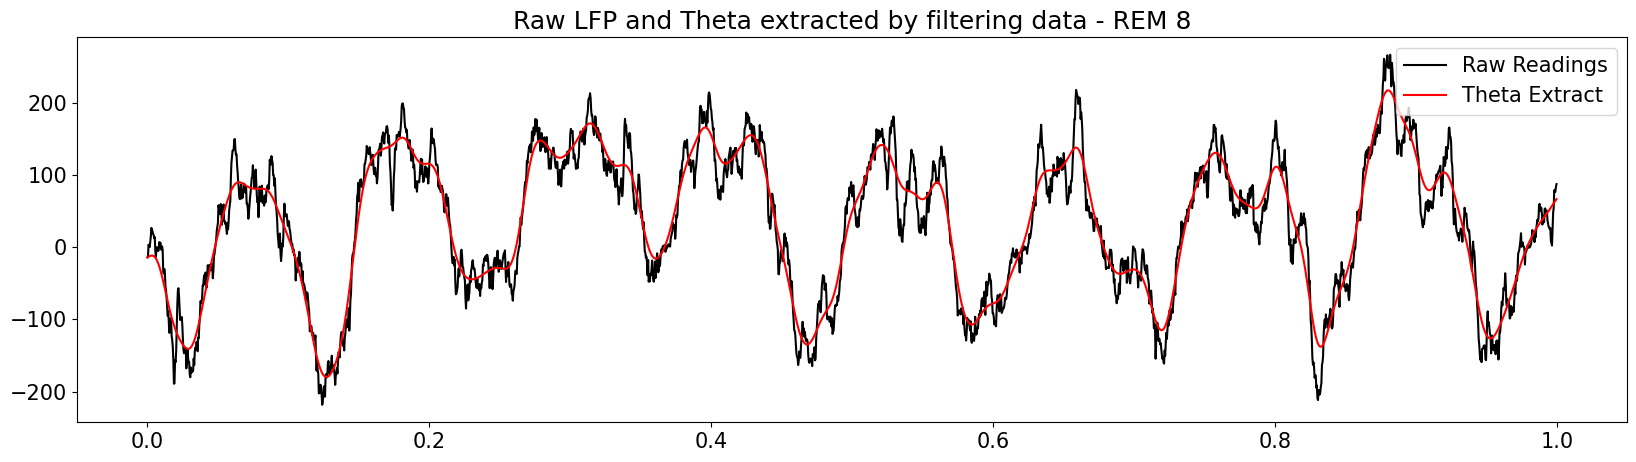

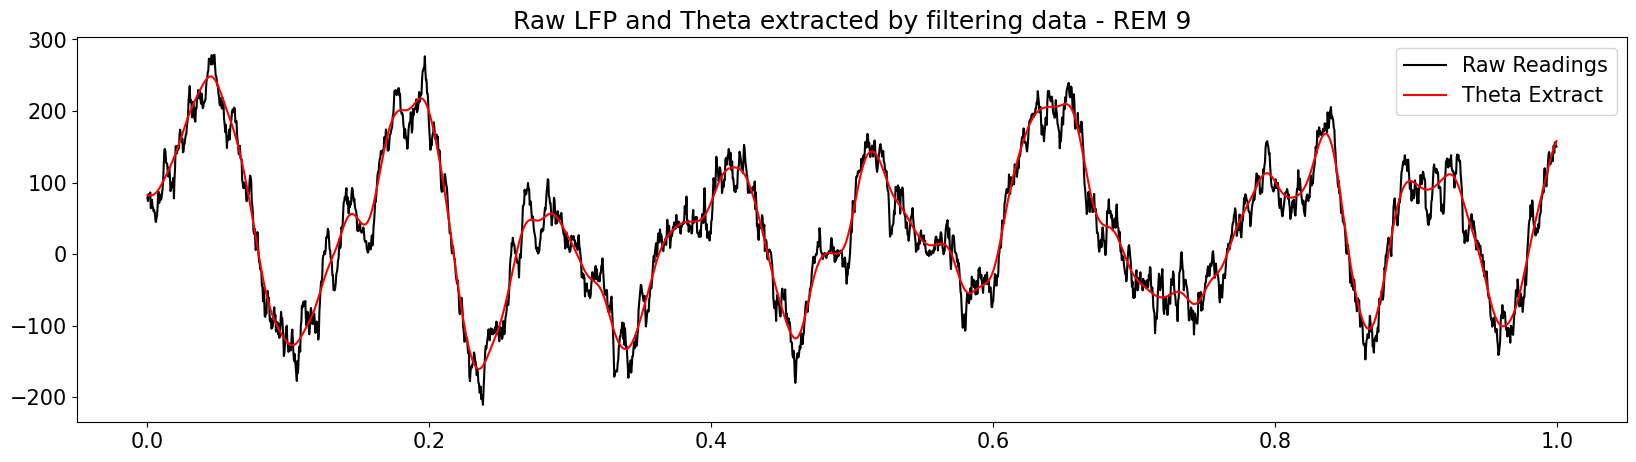

In [31]:
#@title Example of frequency filtered theta signal
for ii in range(len(filtered_theta)):
  raw_sig = lfp[rem_states[ii,0]:rem_states[ii,1]]
  theta_sig = filtered_theta[ii]
  time=len(raw_sig)/s_rate
  seconds=np.linspace(0,time,len(raw_sig))
  plt.figure(figsize=(12, 6))
  plt.gcf().set_size_inches(20, 5)
  plt.rcParams.update({'font.size': 15})
  # plt.plot(seconds[:sample_rate],Vhi[:sample_rate])
  plt.plot(seconds[:s_rate],raw_sig[:s_rate],'-k',label='Raw Readings')
  plt.plot(seconds[:s_rate],theta_sig[:s_rate],'-r',label='Theta Extract')
  titlee = 'Raw LFP and Theta extracted by filtering data - REM ' + str(ii + 1)
  plt.title(titlee)
  plt.legend(loc="upper right")


## Defining the theta-gamma split function


While we can extract theta signals using a bandpass filter we can also extract using the sifting technique, where once the intrinsic mode functions are determined, we would analyse each IMF signal for their average frequency behavior and select the individual frequencies that lie within the theta range

In [32]:
# Define a simple function to calcuclate the average frequencies of each IMF

def imf_freq(imf,sample_rate,mode='nht'):
  _,IF,_=emd.spectra.frequency_transform(imf,sample_rate,'nht')
  freq_vec=np.mean(IF,axis=0)
  return freq_vec

In [33]:
# Example of the average frequencies calculated from IMFs of normal sifting

sift_mask_freq=imf_freq(sift,s_rate)
print(f'{sift_mask_freq} in Hz')

[ 5.83900877e+02  2.38999478e+02  8.77900866e+01  3.26115013e+01
  1.01625846e+01  4.43134745e+00  1.97679093e+00  7.82772724e-01
  3.43281954e-01  1.33714744e-01  5.17962553e-02  2.19744747e-02
 -1.14793997e-04] in Hz


In [34]:
# Defining the theta gamma split function

def tg_split(mask_freq, theta_range=(5, 12)):
    """
        Split a frequency vector into sub-theta, theta, and supra-theta components.

        Parameters:
        mask_freq (numpy.ndarray): A frequency vector or array of frequency values.
        theta_range (tuple, optional): A tuple defining the theta frequency range (lower, upper).
            Default is (5, 12).

        Returns:
        tuple: A tuple containing boolean masks for sub-theta, theta, and supra-theta frequency components.

        Notes: - This function splits a frequency mask into three components based on a specified theta frequency
        range. - The theta frequency range is defined by the 'theta_range' parameter. - The resulting masks 'sub',
        'theta', and 'supra' represent sub-theta, theta, and supra-theta frequency components.
    """
    lower = np.min(theta_range)
    upper = np.max(theta_range)
    mask_index = np.logical_and(mask_freq >= lower, mask_freq < upper)
    sub_mask_index = mask_freq < lower
    supra_mask_index = mask_freq > upper
    sub = sub_mask_index
    theta = mask_index
    supra = supra_mask_index

    return sub, theta, supra

## Comparison of theta signal extraction to raw signal from different sifting methods

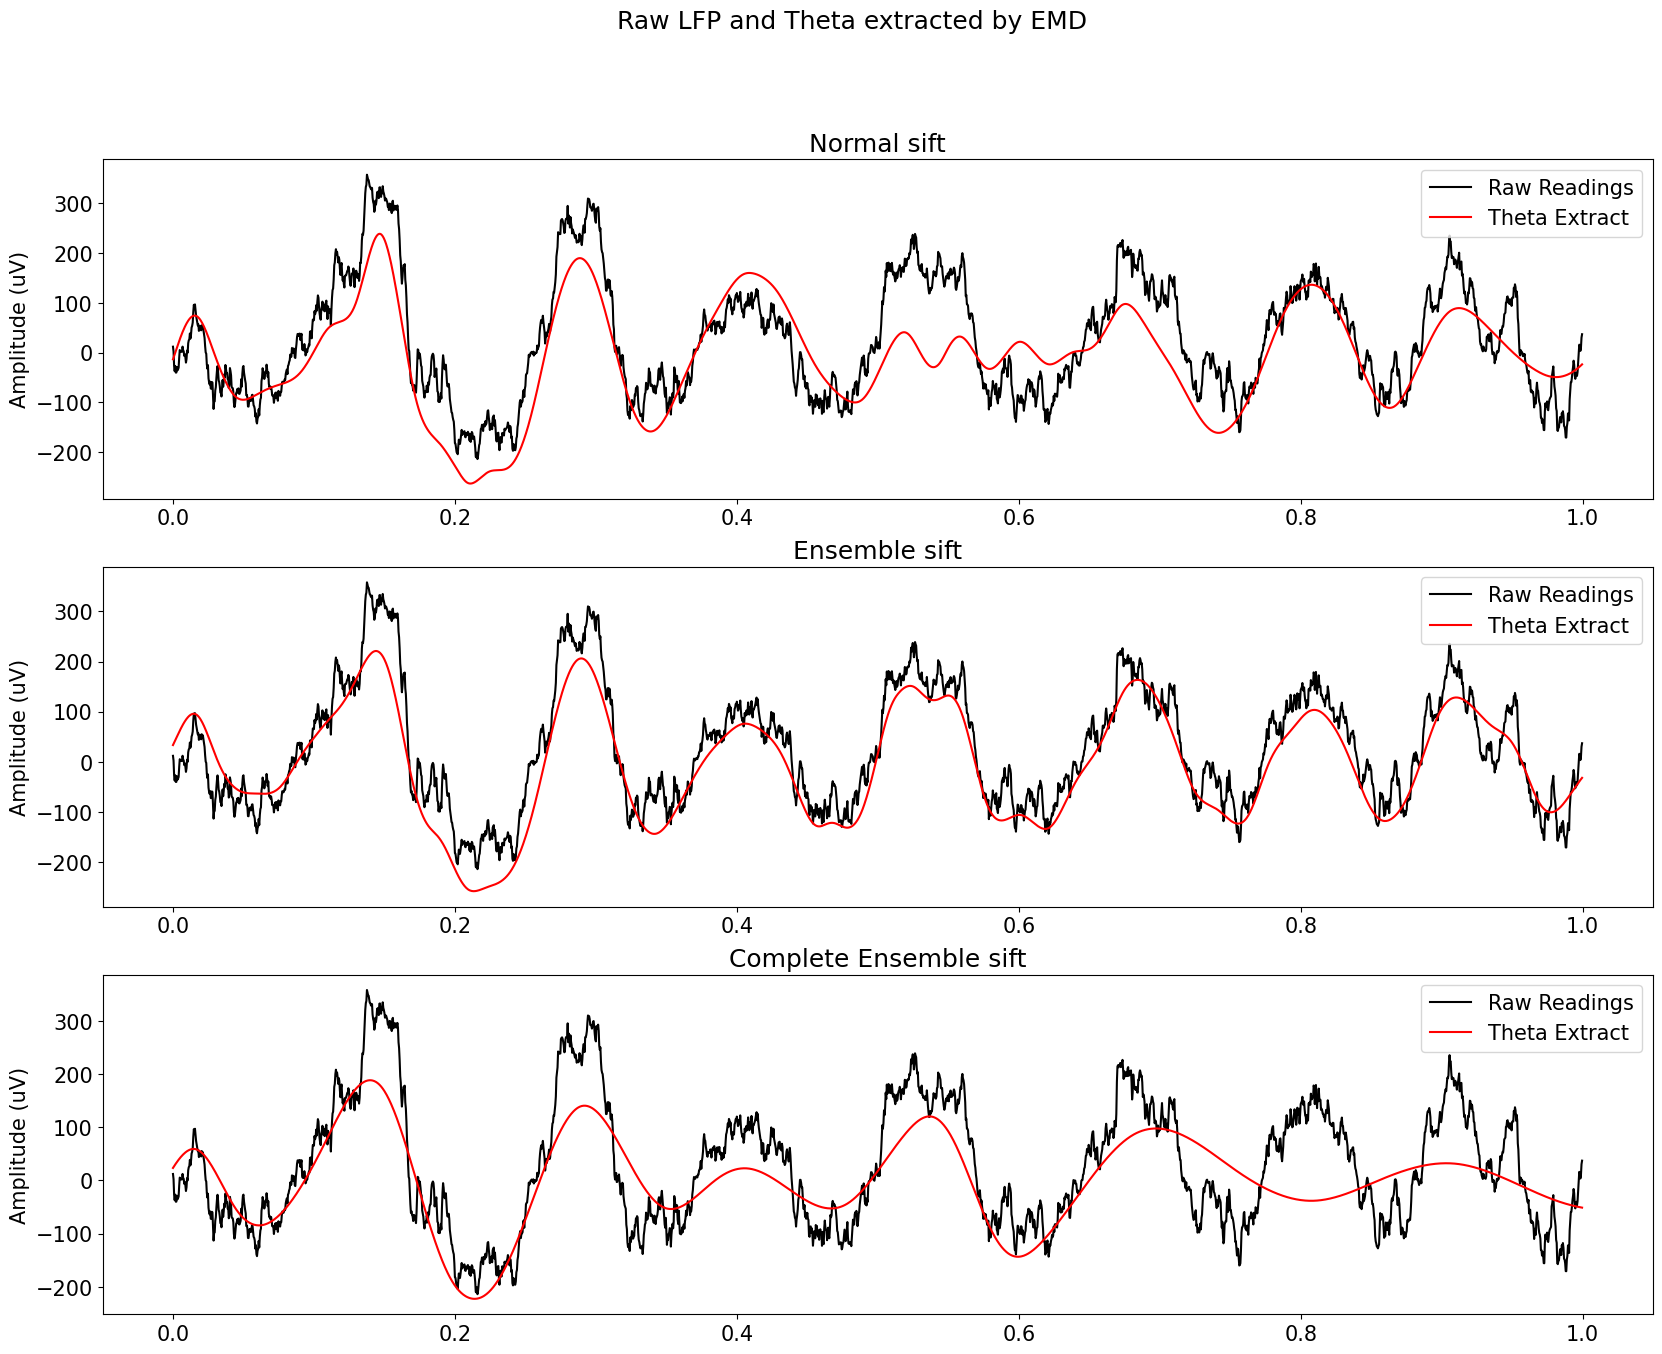

In [38]:
# Create the time vector for plotting


# Loop through each REM state to plot the results for each sift method
fig1, ax1 = plt.subplots(3, figsize=(20, 15))
plt.rcParams.update({'font.size': 15})

time = len(first_rem) / s_rate
seconds = np.linspace(0, time, len(first_rem))
# Normal sift
sift_mask_freq = imf_freq(sift, s_rate)
_, sift_theta, _ = tg_split(sift_mask_freq)
sift_thetasig = np.sum(sift.T[sift_theta], axis=0)
ax1[0].plot(seconds[:2500], first_rem[:2500], '-k', label='Raw Readings')
ax1[0].plot(seconds[:2500], sift_thetasig[:2500], '-r', label='Theta Extract')
ax1[0].legend(loc="upper right")
ax1[0].set_ylabel('Amplitude (uV)')
ax1[0].set_title('Normal sift')

# Ensemble sift
ensemble_mask_freq = imf_freq(ensemble, s_rate)
_, ensemble_theta, _ = tg_split(ensemble_mask_freq)
ensemble_thetasig = np.sum(ensemble.T[ensemble_theta], axis=0)
ax1[1].plot(seconds[:2500], first_rem[:2500], '-k', label='Raw Readings')
ax1[1].plot(seconds[:2500], ensemble_thetasig[:2500], '-r', label='Theta Extract')
ax1[1].legend(loc="upper right")
ax1[1].set_ylabel('Amplitude (uV)')
ax1[1].set_title('Ensemble sift')

# Complete Ensemble sift
censemble_mask_freq = imf_freq(censemble, s_rate)
_, censemble_theta, _ = tg_split(censemble_mask_freq)
censemble_thetasig = np.sum(censemble.T[censemble_theta], axis=0)
ax1[2].plot(seconds[:2500], first_rem[:2500], '-k', label='Raw Readings')
ax1[2].plot(seconds[:2500], censemble_thetasig[:2500], '-r', label='Theta Extract')
ax1[2].legend(loc="upper right")
ax1[2].set_ylabel('Amplitude (uV)')
ax1[2].set_title('Complete Ensemble sift')

titlee = 'Raw LFP and Theta extracted by EMD'
fig1.suptitle(titlee)
plt.show()  # Display the plots for the current REM state

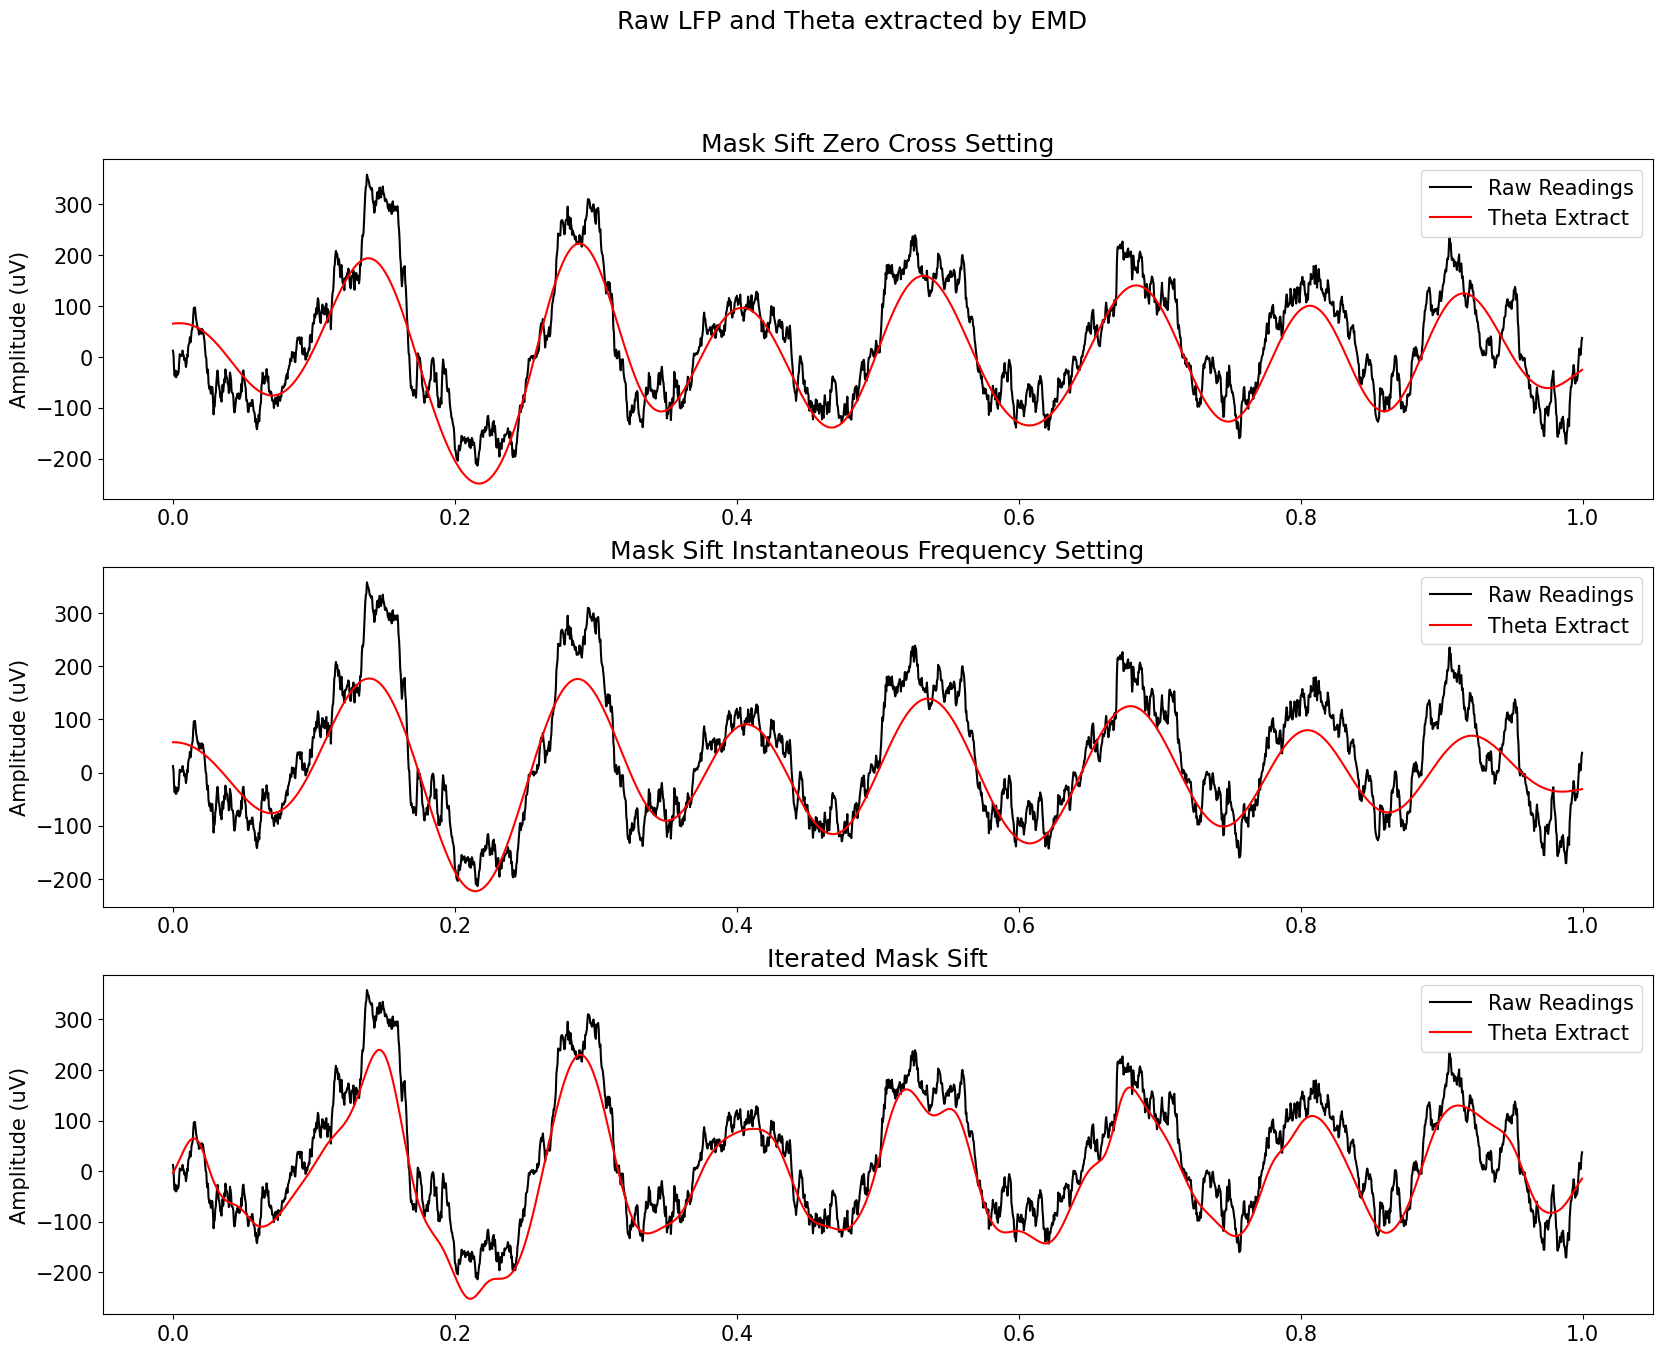

In [39]:
# Loop through each REM state to plot the results for each sift method
fig2, ax2 = plt.subplots(3, figsize=(20, 15))
plt.rcParams.update({'font.size': 15})

time = len(first_rem) / s_rate
seconds = np.linspace(0, time, len(first_rem))

# Mask Sift Zero Cross Setting
_, maskzc_theta, _ = tg_split(maskzc[1] * s_rate)
maskzc_thetasig = np.sum(maskzc[0].T[maskzc_theta], axis=0)
ax2[0].plot(seconds[:2500], first_rem[:2500], '-k', label='Raw Readings')
ax2[0].plot(seconds[:2500], maskzc_thetasig[:2500], '-r', label='Theta Extract')
ax2[0].legend(loc="upper right")
ax2[0].set_ylabel('Amplitude (uV)')
ax2[0].set_title('Mask Sift Zero Cross Setting')

# Mask Sift Instantaneous Frequency Setting
_, maskif_theta, _ = tg_split(maskif[1] * s_rate)
maskif_thetasig = np.sum(maskif[0].T[maskif_theta], axis=0)
ax2[1].plot(seconds[:2500], first_rem[:2500], '-k', label='Raw Readings')
ax2[1].plot(seconds[:2500], maskif_thetasig[:2500], '-r', label='Theta Extract')
ax2[1].legend(loc="upper right")
ax2[1].set_ylabel('Amplitude (uV)')
ax2[1].set_title('Mask Sift Instantaneous Frequency Setting')

# Iterated Mask Sift
_, imask_theta, _ = tg_split(imask[1])
imask_thetasig = np.sum(imask[0].T[imask_theta], axis=0)
ax2[2].plot(seconds[:2500], first_rem[:2500], '-k', label='Raw Readings')
ax2[2].plot(seconds[:2500], imask_thetasig[:2500], '-r', label='Theta Extract')
ax2[2].legend(loc="upper right")
ax2[2].set_ylabel('Amplitude (uV)')
ax2[2].set_title('Iterated Mask Sift')

titlee = 'Raw LFP and Theta extracted by EMD'
fig2.suptitle(titlee)
plt.show()  # Display the plots for the current REM state

# The wavelet transform

In [40]:
# Extract the theta signal

sub_theta, theta, supra_theta = tg_split(imask[1])
theta_sig=np.sum(imask[0].T[theta],axis=0)
supra_theta_sig=np.sum(imask[0].T[supra_theta],axis=0)
sub_theta_sig= np.sum(imask[0].T[sub_theta],axis=0)

In [41]:
# Generate the IMFs
imask=emd.sift.iterated_mask_sift(first_rem,mask_0='zc',sample_rate=s_rate,ret_mask_freq='True')

# Extract the theta signal
sub_theta, theta, supra_theta = tg_split(imask[1])
theta_sig=np.sum(imask[0].T[theta],axis=0)
supra_theta_sig=np.sum(imask[0].T[supra_theta],axis=0)
sub_theta_sig= np.sum(imask[0].T[sub_theta],axis=0)

In [44]:
frequencies= np.arange(15,141,1)
theta_range=(5,12)
time=len(first_rem)/s_rate
seconds=np.linspace(0,time,len(first_rem))

first_rem_wt= sails.wavelet.morlet(first_rem, freqs=frequencies, sample_rate=s_rate, ncycles=5,ret_mode='power', normalise=None)
theta_wt= sails.wavelet.morlet(theta_sig, freqs=frequencies, sample_rate=s_rate, ncycles=5,ret_mode='power', normalise=None)
supra_theta_wt= sails.wavelet.morlet(supra_theta_sig, freqs=frequencies, sample_rate=s_rate, ncycles=5,ret_mode='power', normalise=None)


Text(0, 0.5, 'Frequency (Hz)')

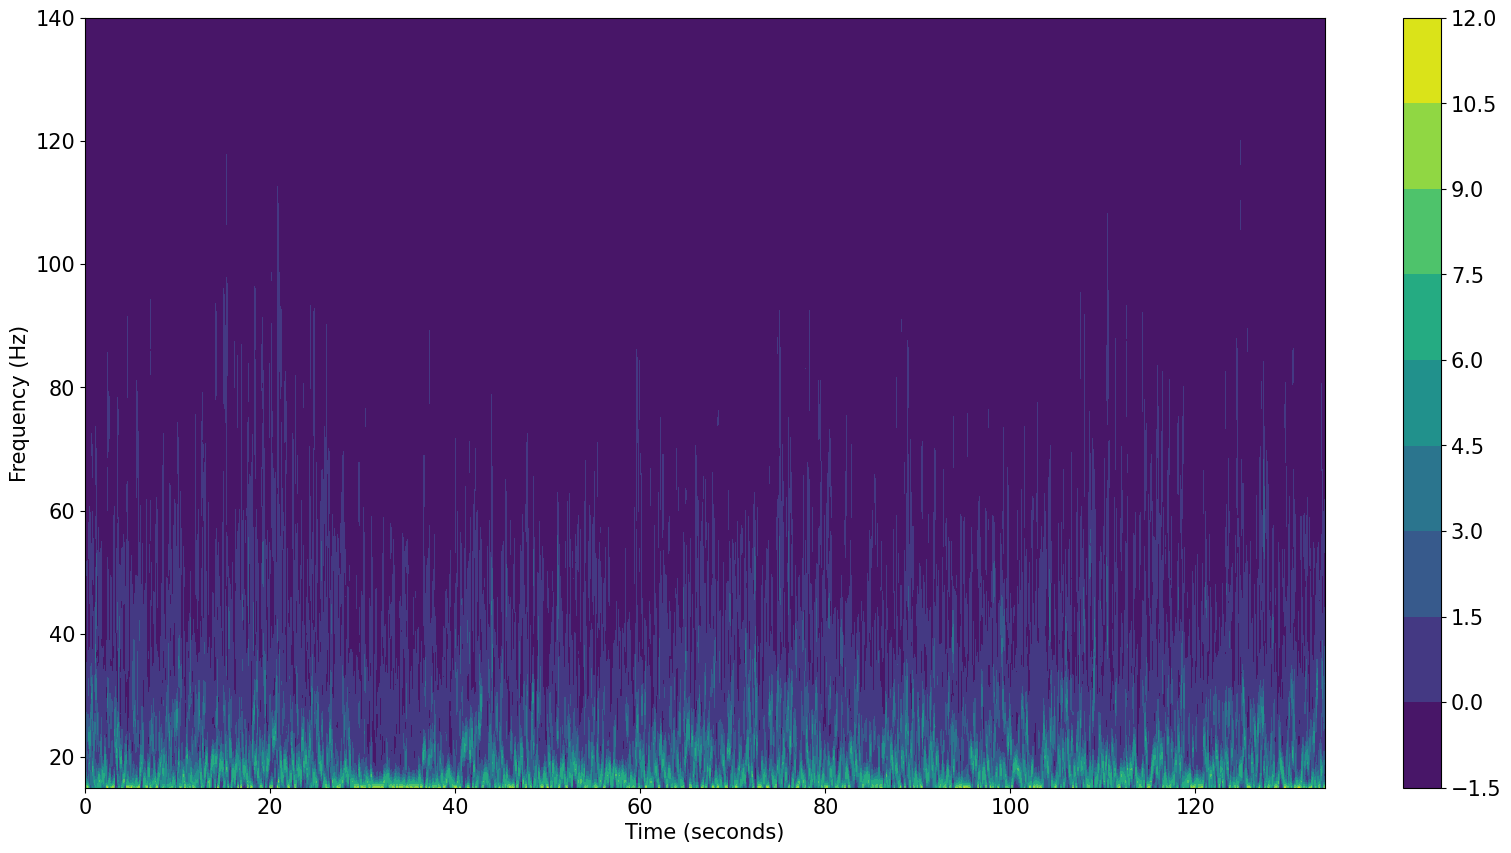

In [45]:
plt.gcf().set_size_inches(20, 10)
first_rem_wt=scipy.stats.zscore(first_rem_wt,axis=0) #Z-Score Normalize the dataset
plt.contourf(seconds,frequencies,first_rem_wt)
plt.colorbar()
plt.xlabel(r'Time (seconds)')
plt.ylabel(r'Frequency (Hz)')

In [46]:
# Extract the theta, supra-theta, and sub-theta signals for each REM state

sub_theta, theta, supra_theta = tg_split(imask[1])
theta_sig = np.sum(imask[0].T[theta], axis=0)
supra_theta_sig = np.sum(imask[0].T[supra_theta], axis=0)
sub_theta_sig = np.sum(imask[0].T[sub_theta], axis=0)

In [ ]:
frequencies = np.arange(15, 141, 1)
theta_range = (5, 12)
sample_rate = 2500

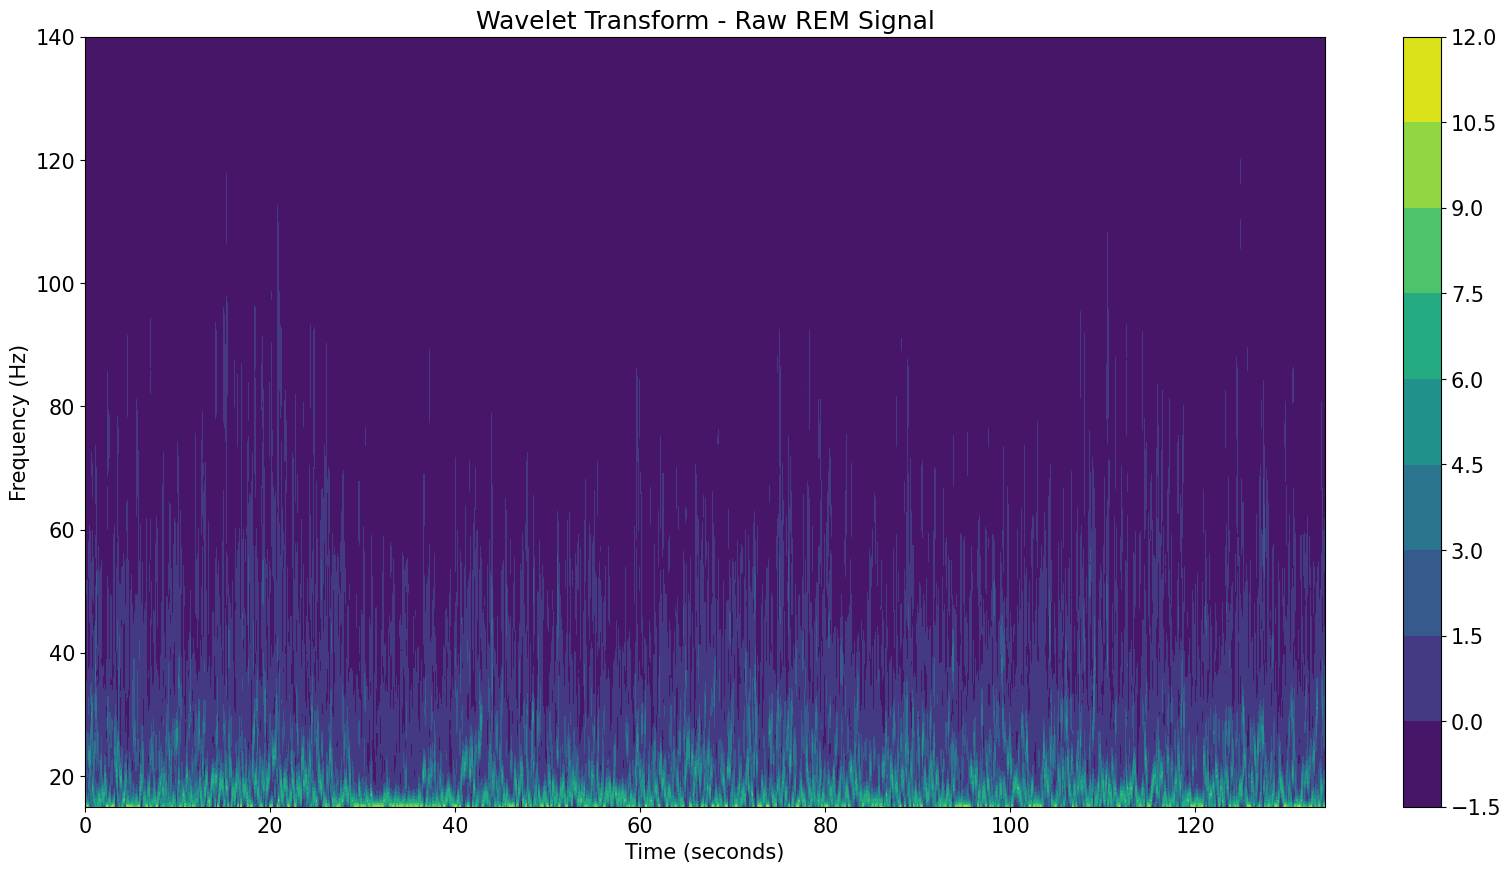

In [49]:
# Plot the raw REM signal wavelet transforms

time = len(first_rem) / s_rate
seconds = np.linspace(0, time, len(first_rem))

plt.figure(figsize=(20, 10))
normalized_raw_wt = scipy.stats.zscore(first_rem_wt, axis=0)  # Z-Score Normalize the dataset
plt.contourf(seconds, frequencies, normalized_raw_wt)
plt.colorbar()
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.title(f'Wavelet Transform - Raw REM Signal')
plt.show()

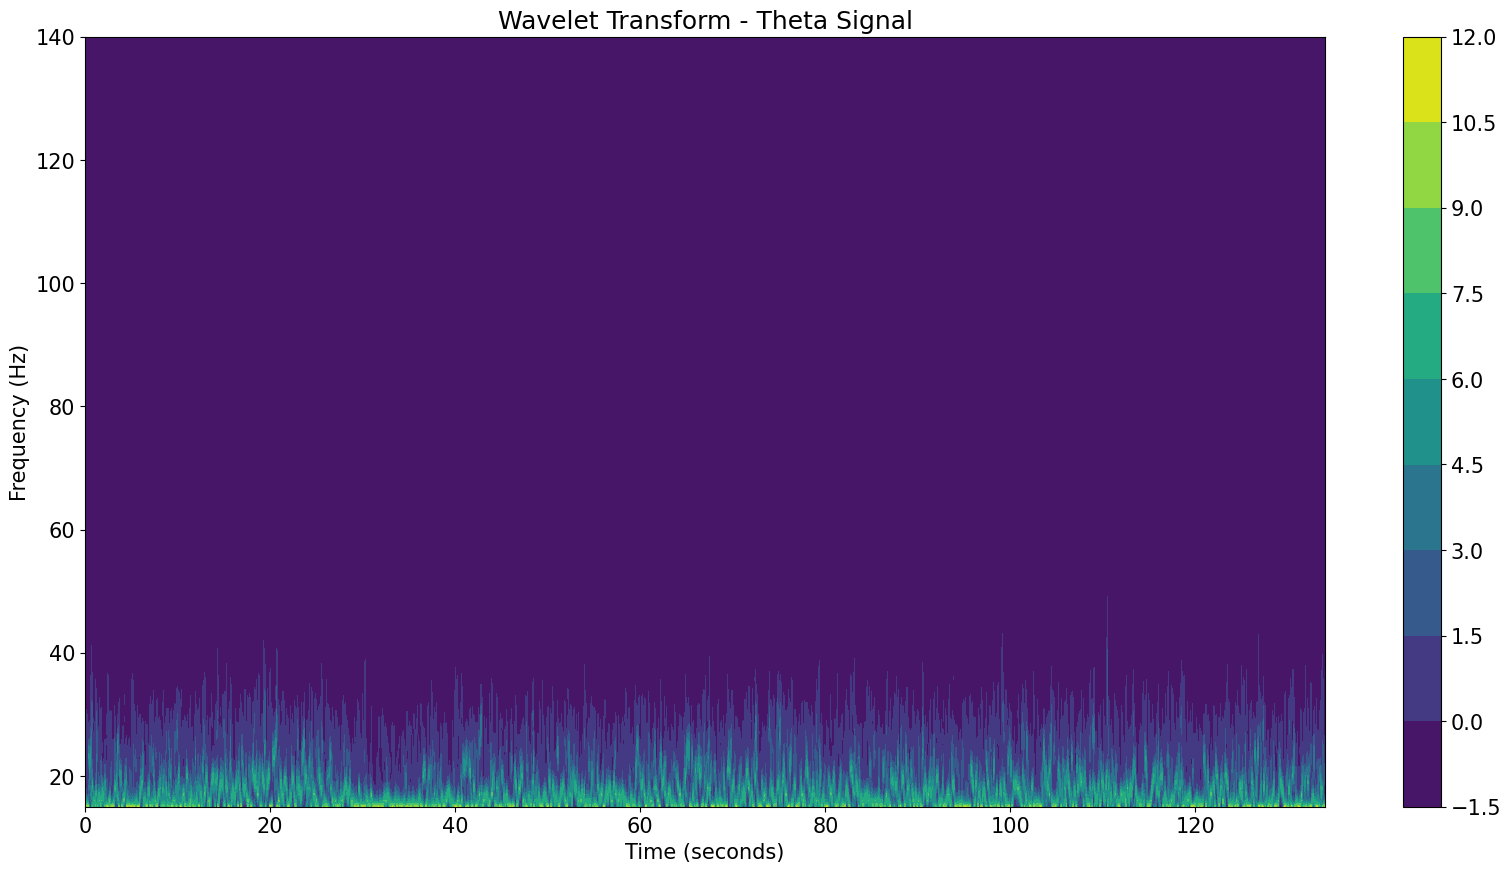

In [50]:
# Plot the theta signal wavelet transforms
time = len(first_rem) / s_rate
seconds = np.linspace(0, time, len(first_rem))

plt.figure(figsize=(20, 10))
normalized_theta_wt = scipy.stats.zscore(theta_wt, axis=0)  # Z-Score Normalize the dataset
plt.contourf(seconds, frequencies, normalized_theta_wt)
plt.colorbar()
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.title(f'Wavelet Transform - Theta Signal')
plt.show()

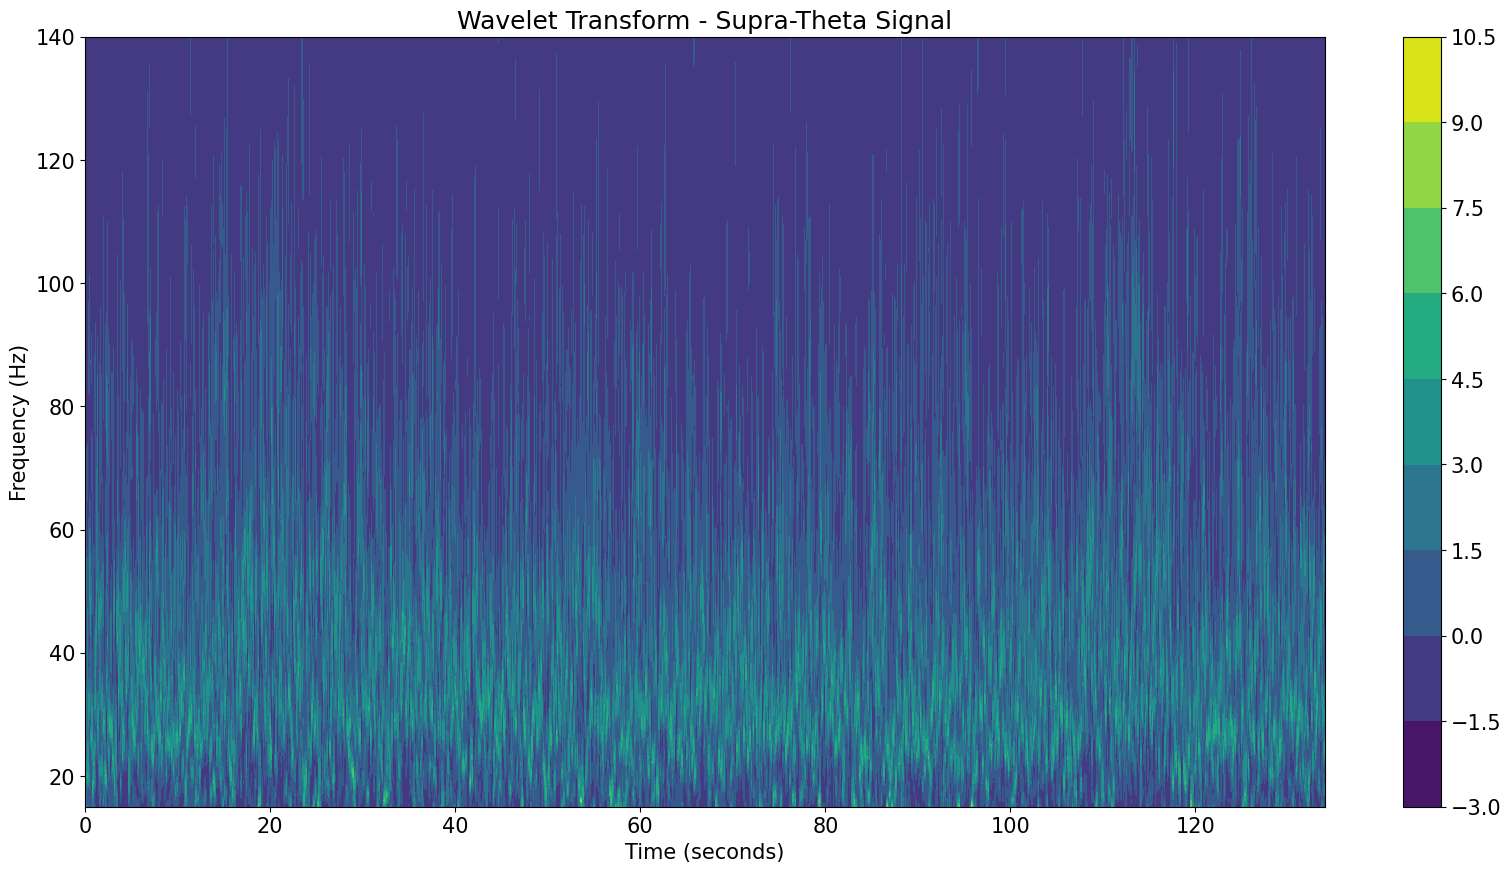

In [51]:
# Plot the supra-theta signal wavelet transforms
time = len(first_rem) / s_rate
seconds = np.linspace(0, time, len(first_rem))

plt.figure(figsize=(20, 10))
normalized_supra_theta_wt = scipy.stats.zscore(supra_theta_wt, axis=0)  # Z-Score Normalize the dataset
plt.contourf(seconds, frequencies, normalized_supra_theta_wt)
plt.colorbar()
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.title(f'Wavelet Transform - Supra-Theta Signal')
plt.show()

In [52]:
# Define a morlet wavelet transform function
def morlet_wt(x, sample_rate, frequencies=np.arange(1, 200, 1), n=5, mode='complex'):
    """
        Compute the Morlet Wavelet Transform of a signal.

        Parameters: x (numpy.ndarray): The input signal for which the Morlet Wavelet Transform is computed.
        sample_rate (int or float): The sampling rate of the input signal. frequencies (numpy.ndarray, optional): An
        array of frequencies at which to compute the wavelet transform. Default is a range from 1 to 200 Hz with a
        step of 1 Hz. n (int, optional): The number of cycles of the Morlet wavelet. Default is 5. mode (str,
        optional): The return mode for the wavelet transform. Options are 'complex' (default),'amplitude', and 'power'.

        Returns:
        numpy.ndarray: The Morlet Wavelet Transform of the input signal.

        Notes: - This function computes the Morlet Wavelet Transform of a given signal. - The wavelet transform is
        computed at specified frequencies. - The number of cycles for the Morlet wavelet can be adjusted using the
        'n' parameter. - The result can be returned in either complex or magnitude form either as amplitude or power,
        as specified by the 'mode' parameter.
    """
    wavelet_transform = sails.wavelet.morlet(x, freqs=frequencies, sample_rate=sample_rate, ncycles=n,
                                             ret_mode=mode, normalise=None)
    return wavelet_transform

In [53]:
def extrema(x):
    """
    Find extrema (peaks, troughs) and zero crossings in a 1D signal.

    Parameters:
    x (numpy.ndarray): The input 1D signal.

    Returns:
    tuple: A tuple containing:
        - numpy.ndarray: Indices of zero-crossings in the input signal.
        - numpy.ndarray: Indices of troughs in the input signal.
        - numpy.ndarray: Indices of peaks in the input signal.

    Notes:
    - This function identifies and returns the indices of zero-crossings, troughs, and peaks in a given 1D signal.
    - Zero-crossings are points where the signal crosses the zero axis.
    - Troughs are local minima, and peaks are local maxima in the signal.
    """
    zero_xs = zero_cross(x)
    peaks = np.empty((0,)).astype(int)
    troughs = np.empty((0,)).astype(int)
    for t1, t2 in zip(zero_xs, zero_xs[1:]):
        extrema0 = np.argmax(np.abs(x[t1:t2])).astype(int) + t1
        if bool(x[extrema0] > 0):
            peaks = np.append(peaks, extrema0)
        else:
            troughs = np.append(troughs, extrema0)
    return zero_xs, troughs, peaks

In [54]:
def zero_cross(x):
    """
    Find the indices of zero-crossings in a 1D signal.

    Parameters:
    x (numpy.ndarray): The input 1D signal.

    Returns:
    numpy.ndarray: An array of indices where zero-crossings occur in the input signal.

    Notes:
    - This function identifies the indices where zero-crossings occur in a given 1D signal.
    - It detects both rising and falling zero-crossings.
    """
    decay = np.logical_and((x > 0)[1:], ~(x > 0)[:-1]).nonzero()[0]
    rise = np.logical_and((x <= 0)[1:], ~(x <= 0)[:-1]).nonzero()[0]
    zero_xs = np.sort(np.append(rise, decay))
    return zero_xs

In [55]:
# Tutorial 2 Summary
def get_cycles_data(x, rem_states, sample_rate, frequencies, theta_range=(5, 12)):
    """
    Generate a nested dictionary containing extracted data and desired metadata of each REM epochs in the input sleep
    signal

    Parameters:
    x (numpy.ndarray): The input 1D sleep signal.
    rem_states (numpy.ndarray): A sleep state vector where 5 represents REM sleep and other values indicate non-REM.
    sample_rate (int or float): The sampling rate of the data.
    theta_range (tuple, optional): A tuple defining the theta frequency range (lower, upper).
            Default is (5, 12).

    Returns:
    rem_dict: A nested dictionary of extracted signal data and signal source metadata

    Notes:
    - The dictionary output structure comes out as below:
        |----REM 1
        |    |----start_end:
        |    |----IMFs:
        |    |----IMF Frequencies:
        |    |----Instantaneous Phases:
        |    |----Instantaneous Frequencies:
        |    |----Instantaneous Amplitudes:
        |    |----Cycles:
        |----REM (...)
        |    |--------(...)
    """

    # Squeezing dimensions
    x = np.squeeze(x)
    rem_states = np.squeeze(rem_states)

    print(x.shape)
    print(rem_states.shape)

    # Detect REM periods
    consecutive_rem_states = get_rem_states(rem_states, sample_rate).astype(int)

    if consecutive_rem_states.ndim == 3:
        consecutive_rem_states=np.squeeze(consecutive_rem_states,0)

    print('shape of consecutive_rem_states: ', consecutive_rem_states.shape)

    # Intiializing variables
    wt_spectrum = []
    rem_imf = []
    rem_mask_freq = []
    instantaneous_phase = []
    instantaneous_freq = []
    instantaneous_amp = []
    sub_theta_sig = np.empty((0,))
    theta_peak_sig = np.empty((0,))
    cycles = np.empty((0, 5))
    rem_dict = {}
    sub_dict = rem_dict
    good_rem = []
    count = 0
    # Loop through each REM epoch
    for i, rem in enumerate(consecutive_rem_states):
        start = rem[0]
        end = rem[1]+1
        signal = x[start:end]

        # Extraction of IMFs and IMF Frequencies for current REM epoch
        print('Finding Intrinsic Mode Functions')
        imf, mask_freq = emd.sift.iterated_mask_sift(signal, mask_0='zc', sample_rate=sample_rate, ret_mask_freq=True)

        # Extract Instantaneous Phase, Frequencies and Amplitudes of each IMF for current REM epoch
        print('Extracting Instantaneous Phase, Frequencies and Amplitudes of each IMF')
        IP, IF, IA = emd.spectra.frequency_transform(imf, sample_rate, 'nht')

        # Identify sub-theta, theta, and supra-theta frequencies
        sub_theta, theta, supra_theta = tg_split(mask_freq, theta_range)

        if np.any(theta):
            print('Theta frequencies are valid')
            count += 1
            good_rem.append(i)
            sub_dict.setdefault(f'REM {count}', {})
        elif not np.any(theta):
            print(f'No valid theta frequencies for REM {i}')
            continue

        print(f'Processing REM {count} ')

        # Generate the time-frequency power spectrum
        print('Generating time-frequency matrix')
        wavelet_transform = morlet_wt(signal, sample_rate, frequencies, mode='amplitude')

        # print('Generating time-frequency matrix')
        # if wavelet =='theta':
        #     wavelet_transform = morlet_wt(np.sum(imf.T[theta], axis=0),
        #                                   sample_rate,
        #                                   frequencies,
        #                                   mode='amplitude')
        # elif wavelet == 'gamma':
        #     wavelet_transform = morlet_wt(np.sum(imf.T[supra_theta], axis=0),
        #                                   sample_rate,
        #                                   frequencies,
        #                                   mode='amplitude')
        # else:
        #     wavelet_transform = morlet_wt(signal, sample_rate, frequencies, mode='amplitude')

        wt_spectrum.append(wavelet_transform)
        rem_imf.append(imf)
        rem_mask_freq.append(mask_freq)
        instantaneous_phase.append(IP)
        instantaneous_freq.append(IF)
        instantaneous_amp.append(IA)

        # Generate the theta signal to detect cycles
        theta_sig = np.sum(imf.T[theta], axis=0)

        # Parse the sub-theta signal of all REM periods into one variable to set amplitude threshold
        sub_theta_sig = np.append(sub_theta_sig, np.sum(imf.T[sub_theta], axis=0))

        # Generate extrema locations and zero crossing on the generated theta signal
        zero_x, trough, peak = extrema(np.sum(imf.T[theta], axis=0))
        print(f'Number of zero crossings, {zero_x.shape}')

        # Create the cycles array for the current REM epoch
        zero_x = np.vstack((zero_x[:-2:2], zero_x[1:-1:2], zero_x[2::2])).T

        size_adjust = np.min([trough.shape[0], zero_x.shape[0], peak.shape[0]])
        zero_x = zero_x[:size_adjust]
        cycle = np.empty((size_adjust, 5))
        cycle[:, [0, 2, 4]] = zero_x
        if trough[0] < peak[0]:
            cycle[:, 1] = trough[:zero_x.shape[0]]
            cycle[:, 3] = peak[:zero_x.shape[0]]
        else:
            cycle[:, 3] = trough[:zero_x.shape[0]]
            cycle[:, 1] = peak[:zero_x.shape[0]]

        broken_cycle = cycle[~np.all(np.diff(cycle, axis=1) > 0, axis=1)]
        broken_cycle_mask = np.diff(broken_cycle, axis=1) > 0

        adjust_condition = np.all(np.all(broken_cycle_mask[1:] == [True, False, False, True],
                                         axis=0) == True)
        adjust_loc = np.where(np.all(np.diff(cycle, axis=1) > 0, axis=1) == False)[0][1:-1]

        fixed_cycle = broken_cycle[1:-1]
        if adjust_condition:
            fixed_cycle[:, 1] = cycle[adjust_loc - 1, 1]
            fixed_cycle[:, 3] = cycle[adjust_loc + 1, 3]
        else:
            fixed_cycle[:, 3] = cycle[adjust_loc - 1, 3]
            fixed_cycle[:, 1] = cycle[adjust_loc + 1, 1]

        cycle = cycle[np.all(np.diff(cycle, axis=1) > 0, axis=1)]
        cycle = np.vstack((cycle, fixed_cycle))
        if trough[0] < peak[0]:
            cycle = np.hstack((cycle[:-1, 1:-1], cycle[1:, :2]))
        else:
            cycle = np.hstack((cycle[:-1, 3].reshape((-1, 1)), cycle[1:, :-1]))
        print(f'Number of cycles, {cycle.shape}')
        # Create an array of amplitudes at the peaks
        theta_peak_sig = np.append(theta_peak_sig, theta_sig[cycle[:, 2].astype(int)])
        cycles = np.vstack((cycles, cycle + start))

    # Set the minimum amplitude threshold and discard unsatisfactory theta peaks
    min_peak_amp = 2 * sub_theta_sig.std()
    peak_mask = theta_peak_sig > min_peak_amp

    # Set the frequency threshold and discard and unsatisfactory difference between trough pairs
    upper_diff = np.floor(1000 / np.min(theta_range))
    lower_diff = np.floor(1000 / np.max(theta_range))
    diff_mask = np.logical_and(np.diff(cycles[:, [0, -1]], axis=1) * (1000 / sample_rate) > lower_diff,
                               np.diff(cycles[:, [0, -1]], axis=1) * (1000 / sample_rate) <= upper_diff)

    # Create a boolean mask that satisfy both the frequency and amplitude threshold criteria
    extrema_mask = np.logical_and(np.squeeze(diff_mask), peak_mask)

    # Pass the boolean mask on the cycles array to discard any unsatisfactory cycles
    cycles = cycles[extrema_mask]

    # Place outputs in a nested dictionary
    for j, rem in enumerate(rem_dict.values()):
        good_rem_states = consecutive_rem_states[good_rem]
        rem['start-end'] = good_rem_states[j]
        rem['wavelet_transform'] = wt_spectrum[j]
        rem['IMFs'] = rem_imf[j]
        rem['IMF_Frequencies'] = rem_mask_freq[j]
        rem['Instantaneous Phases'] = instantaneous_phase[j]
        rem['Instantaneous Frequencies'] = instantaneous_freq[j]
        rem['Instantaneous Amplitudes'] = instantaneous_amp[j]
        cycles_mask = (cycles > good_rem_states[j, 0]) & (cycles < good_rem_states[j, 1])
        cycles_mask = np.all(cycles_mask == True, axis=1)
        if cycles[cycles_mask].size == 0:
            rem_cycles = np.zeros((1, 5)).astype(int) # Empty Cycles Array (none of the cycles passed our thresholds)
        else:
            rem_cycles = cycles[cycles_mask].astype(int)
        rem['Cycles'] = rem_cycles

    return rem_dict, theta_sig

In [56]:
# To demonstrate one example let's extract the cycles of the first REM period
rem_dict, theta_sig=get_cycles_data(lfp,states,2500,frequencies)

(25713792,)
(10284,)
shape of consecutive_rem_states:  (9, 2)
Finding Intrinsic Mode Functions
Extracting Instantaneous Phase, Frequencies and Amplitudes of each IMF
Theta frequencies are valid
Processing REM 1 
Generating time-frequency matrix
Number of zero crossings, (2269,)
Number of cycles, (1133, 5)
Finding Intrinsic Mode Functions
Extracting Instantaneous Phase, Frequencies and Amplitudes of each IMF
Theta frequencies are valid
Processing REM 2 
Generating time-frequency matrix
Number of zero crossings, (1505,)
Number of cycles, (747, 5)
Finding Intrinsic Mode Functions
Extracting Instantaneous Phase, Frequencies and Amplitudes of each IMF
Theta frequencies are valid
Processing REM 3 
Generating time-frequency matrix
Number of zero crossings, (1636,)
Number of cycles, (816, 5)
Finding Intrinsic Mode Functions
Extracting Instantaneous Phase, Frequencies and Amplitudes of each IMF
Theta frequencies are valid
Processing REM 4 
Generating time-frequency matrix
Number of zero crossin

In [57]:
first_rem_cycles=rem_dict['REM 1']['Cycles']
print(first_rem_cycles.shape)
first_rem_wt=rem_dict['REM 1']['wavelet_transform']
print(first_rem_wt.shape)

(945, 5)
(126, 335001)


Text(0.5, 1.0, 'Single cycle Supra-theta Signal TF Matrix')

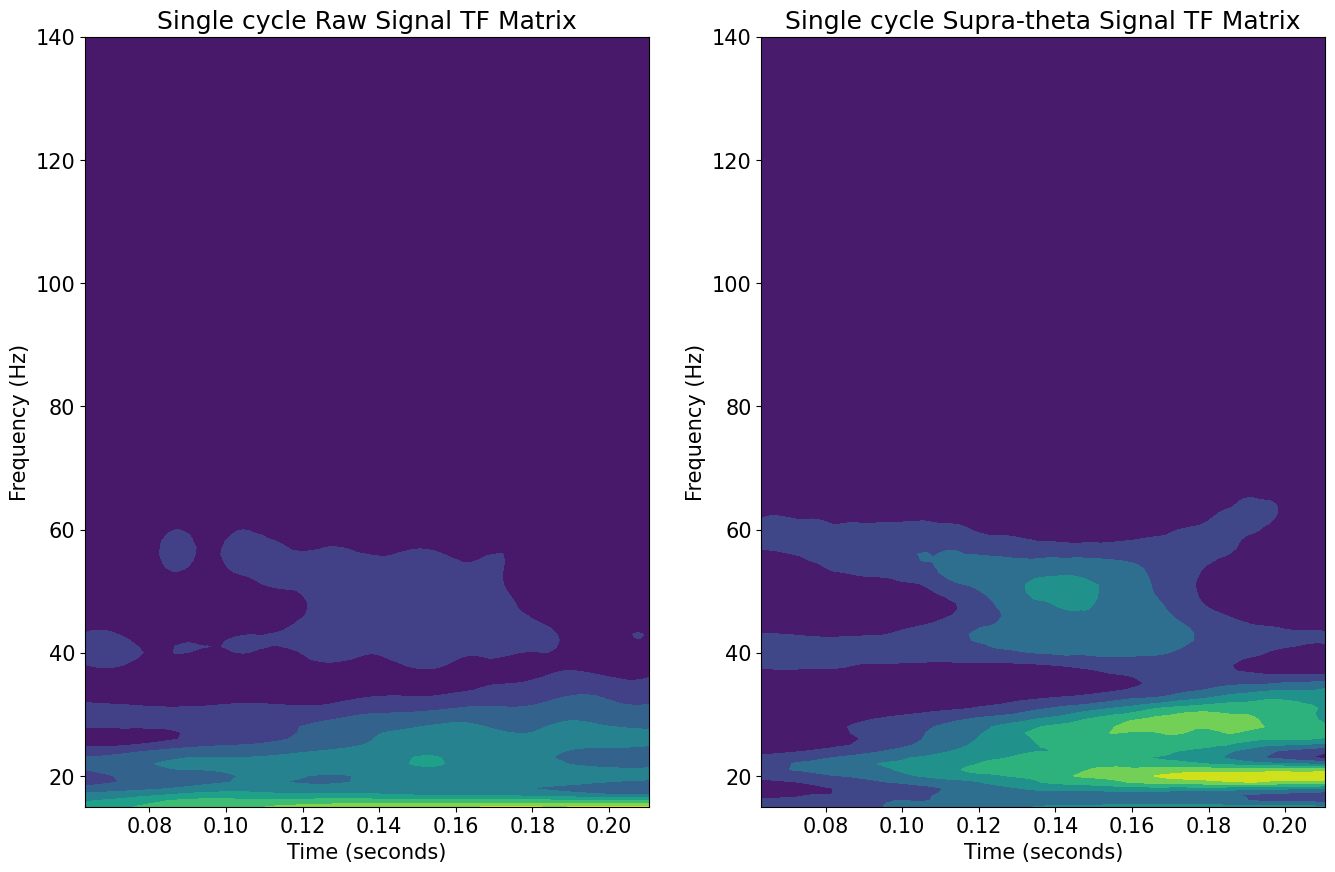

In [58]:
#@title Plotting Time Frequency Matrix of a single cycle of the Raw Signal Wavelet Transform
single_cycle=first_rem_cycles[0]-rem_dict['REM 1']['start-end'][0]
fig,ax=plt.subplots(1,2,figsize=(16,10))
plt.rcParams.update({'font.size': 15})
ax[0].contourf(seconds[single_cycle[0]:single_cycle[-1]+1],frequencies,first_rem_wt[:,single_cycle[0]:single_cycle[-1]+1])
ax[0].set_xlabel(r'Time (seconds)')
ax[0].set_ylabel(r'Frequency (Hz)')
ax[0].set_title('Single cycle Raw Signal TF Matrix')
ax[1].contourf(seconds[single_cycle[0]:single_cycle[-1]+1],frequencies,supra_theta_wt[:,single_cycle[0]:single_cycle[-1]+1])
ax[1].set_xlabel(r'Time (seconds)')
ax[1].set_ylabel(r'Frequency (Hz)')
ax[1].set_title('Single cycle Supra-theta Signal TF Matrix')


In [59]:
#@title Binning samples into respective phase bins

# Define the function to bin time samples into phase segments
def bin_tf_to_fpp(x, power, bin_count):
    """
       Bin time-frequency power data into Frequency Phase Power (FPP) plots using specified time intervals of cycles.

       Parameters:
       x (numpy.ndarray): A 1D or 2D array specifying time intervals of cycles for binning.
           - If 1D, it represents a single time interval [start, end].
           - If 2D, it represents multiple time intervals, where each row is [start, end].
       power (numpy.ndarray): The time-frequency power spectrum data to be binned.
       bin_count (int): The number of bins to divide the time intervals into.

       Returns:
       fpp(numpy.ndarray): Returns FPP plots

       Notes:
       - This function takes time-frequency power data and divides it into FPP plots based on specified
         time intervals.
       - The 'x' parameter defines the time intervals, which can be a single interval or multiple intervals.
       - The 'power' parameter is the time-frequency power data to be binned.
       - The 'bin_count' parameter determines the number of bins within each time interval.
       """

    if x.ndim == 1:  # Handle the case when x is of size (2)
        bin_ranges = np.arange(x[0], x[1], 1)
        fpp = binned_statistic(bin_ranges, power[:, x[0]:x[1]], 'mean', bins=bin_count)[0]
        fpp = np.expand_dims(fpp, axis=0)  # Add an extra dimension to match the desired output shape
    elif x.ndim == 2:  # Handle the case when x is of size (n, 2)
        fpp = []
        for i in range(x.shape[0]):
            bin_ranges = np.arange(x[i, 0], x[i, 1], 1)
            fpp_row = binned_statistic(bin_ranges, power[:, x[i, 0]:x[i, 1]], 'mean', bins=bin_count)[0]
            fpp.append(fpp_row)
        fpp = np.array(fpp)
    else:
        raise ValueError("Invalid size for x")

    return fpp

In [60]:
FPP_cycles=bin_tf_to_fpp(first_rem_cycles[:,[0,-1]]-rem_dict['REM 1']['start-end'][0],first_rem_wt,19)
print(f'{FPP_cycles.shape[0]} cycles of {FPP_cycles.shape[1:]} arrays')

945 cycles of (126, 19) arrays


Text(0.5, 1.0, 'Cycle 2')

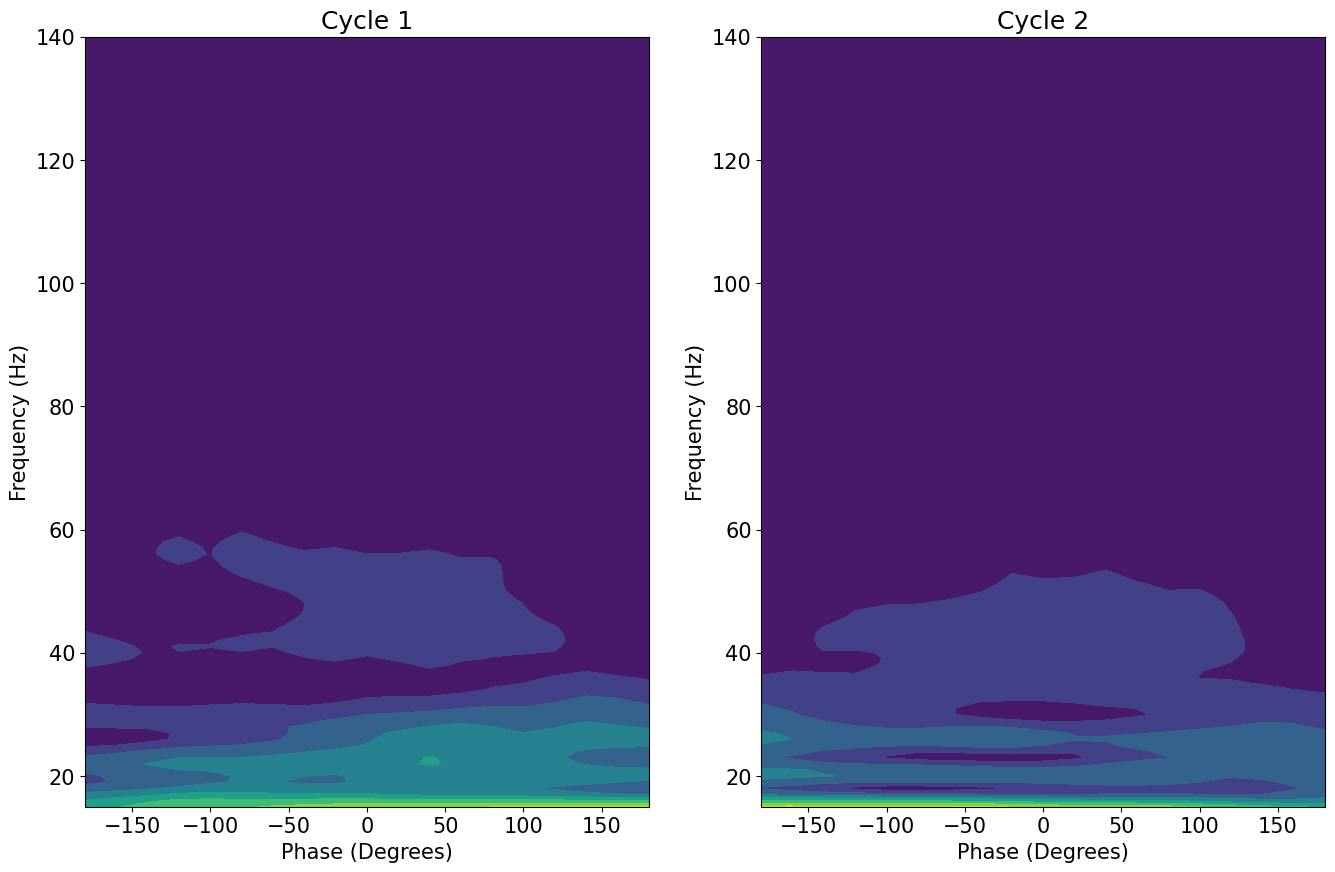

In [61]:
#@title Plotting the FPP plots of the first two cycles
#@markdown Take note of the Phase axis
angles=np.linspace(-180,180,19)
fig,ax=plt.subplots(1,2,figsize=(16,10))
plt.rcParams.update({'font.size': 15})
ax[0].contourf(angles,frequencies,FPP_cycles[0])
ax[0].set_xlabel(r'Phase (Degrees)')
ax[0].set_ylabel(r'Frequency (Hz)')
ax[0].set_title('Cycle 1')
ax[1].contourf(angles,frequencies,FPP_cycles[1])
ax[1].set_xlabel(r'Phase (Degrees)')
ax[1].set_ylabel(r'Frequency (Hz)')
ax[1].set_title('Cycle 2')

In [64]:
start, end = rem_dict['REM 1']['start-end']
signal = lfp[start:end]

# Extract IMFs and Mask Frequencies using EMD
imf, mask_freq = emd.sift.iterated_mask_sift(signal, mask_0='zc', sample_rate=s_rate, ret_mask_freq=True)

# Split into sub-theta, theta, and supra-theta components
theta_range = (5, 12)  # Theta range in Hz
sub_theta, theta, supra_theta = tg_split(mask_freq, theta_range)

# Generate the theta and supra-theta signals
theta_sig = np.sum(imf.T[theta], axis=0)
supra_theta_sig = np.sum(imf.T[supra_theta], axis=0)

# Get the first five cycles
first_rem_cycles = rem_dict['REM 1']['Cycles'][:5]

# Adjust the cycles to be relative to the start of the REM period
adjusted_cycles = first_rem_cycles - start

# Extract the relevant indices
cycle_start = int(adjusted_cycles[0, 0])
cycle_end = int(adjusted_cycles[-1, -1])

# Ensure cycle_end is within bounds of the time-frequency matrix
cycle_end = min(cycle_end, signal.shape[0])

# Debugging prints
print(f"Adjusted Cycle start index: {cycle_start}")
print(f"Adjusted Cycle end index: {cycle_end}")
print(f"Signal length: {len(signal)}")
print(f"Time-frequency matrix shape: {rem_dict['REM 1']['wavelet_transform'].shape}")

# Slice the signal, theta signal, and supra-theta signal for the first five cycles
lfp_signal_5_cycles = signal[cycle_start:cycle_end]
theta_signal_5_cycles = theta_sig[cycle_start:cycle_end]
supra_theta_signal_5_cycles = supra_theta_sig[cycle_start:cycle_end]

# Time vector for the LFP, theta, and supra-theta signals (for the first five cycles)
time_vector = np.linspace(0, len(lfp_signal_5_cycles) / s_rate, len(lfp_signal_5_cycles))  # Assuming sample_rate in Hz

# Extract the wavelet transform (time-frequency matrix) for the first five cycles
first_rem_wt_5_cycles = rem_dict['REM 1']['wavelet_transform'][:, cycle_start:cycle_end]

# Compute the wavelet transform (time-frequency matrix) for the supra-theta signal for the first five cycles
supra_theta_wt_5_cycles = morlet_wt(supra_theta_signal_5_cycles, s_rate, frequencies, mode='amplitude')


Adjusted Cycle start index: 158
Adjusted Cycle end index: 1881
Signal length: 335000
Time-frequency matrix shape: (126, 335001)


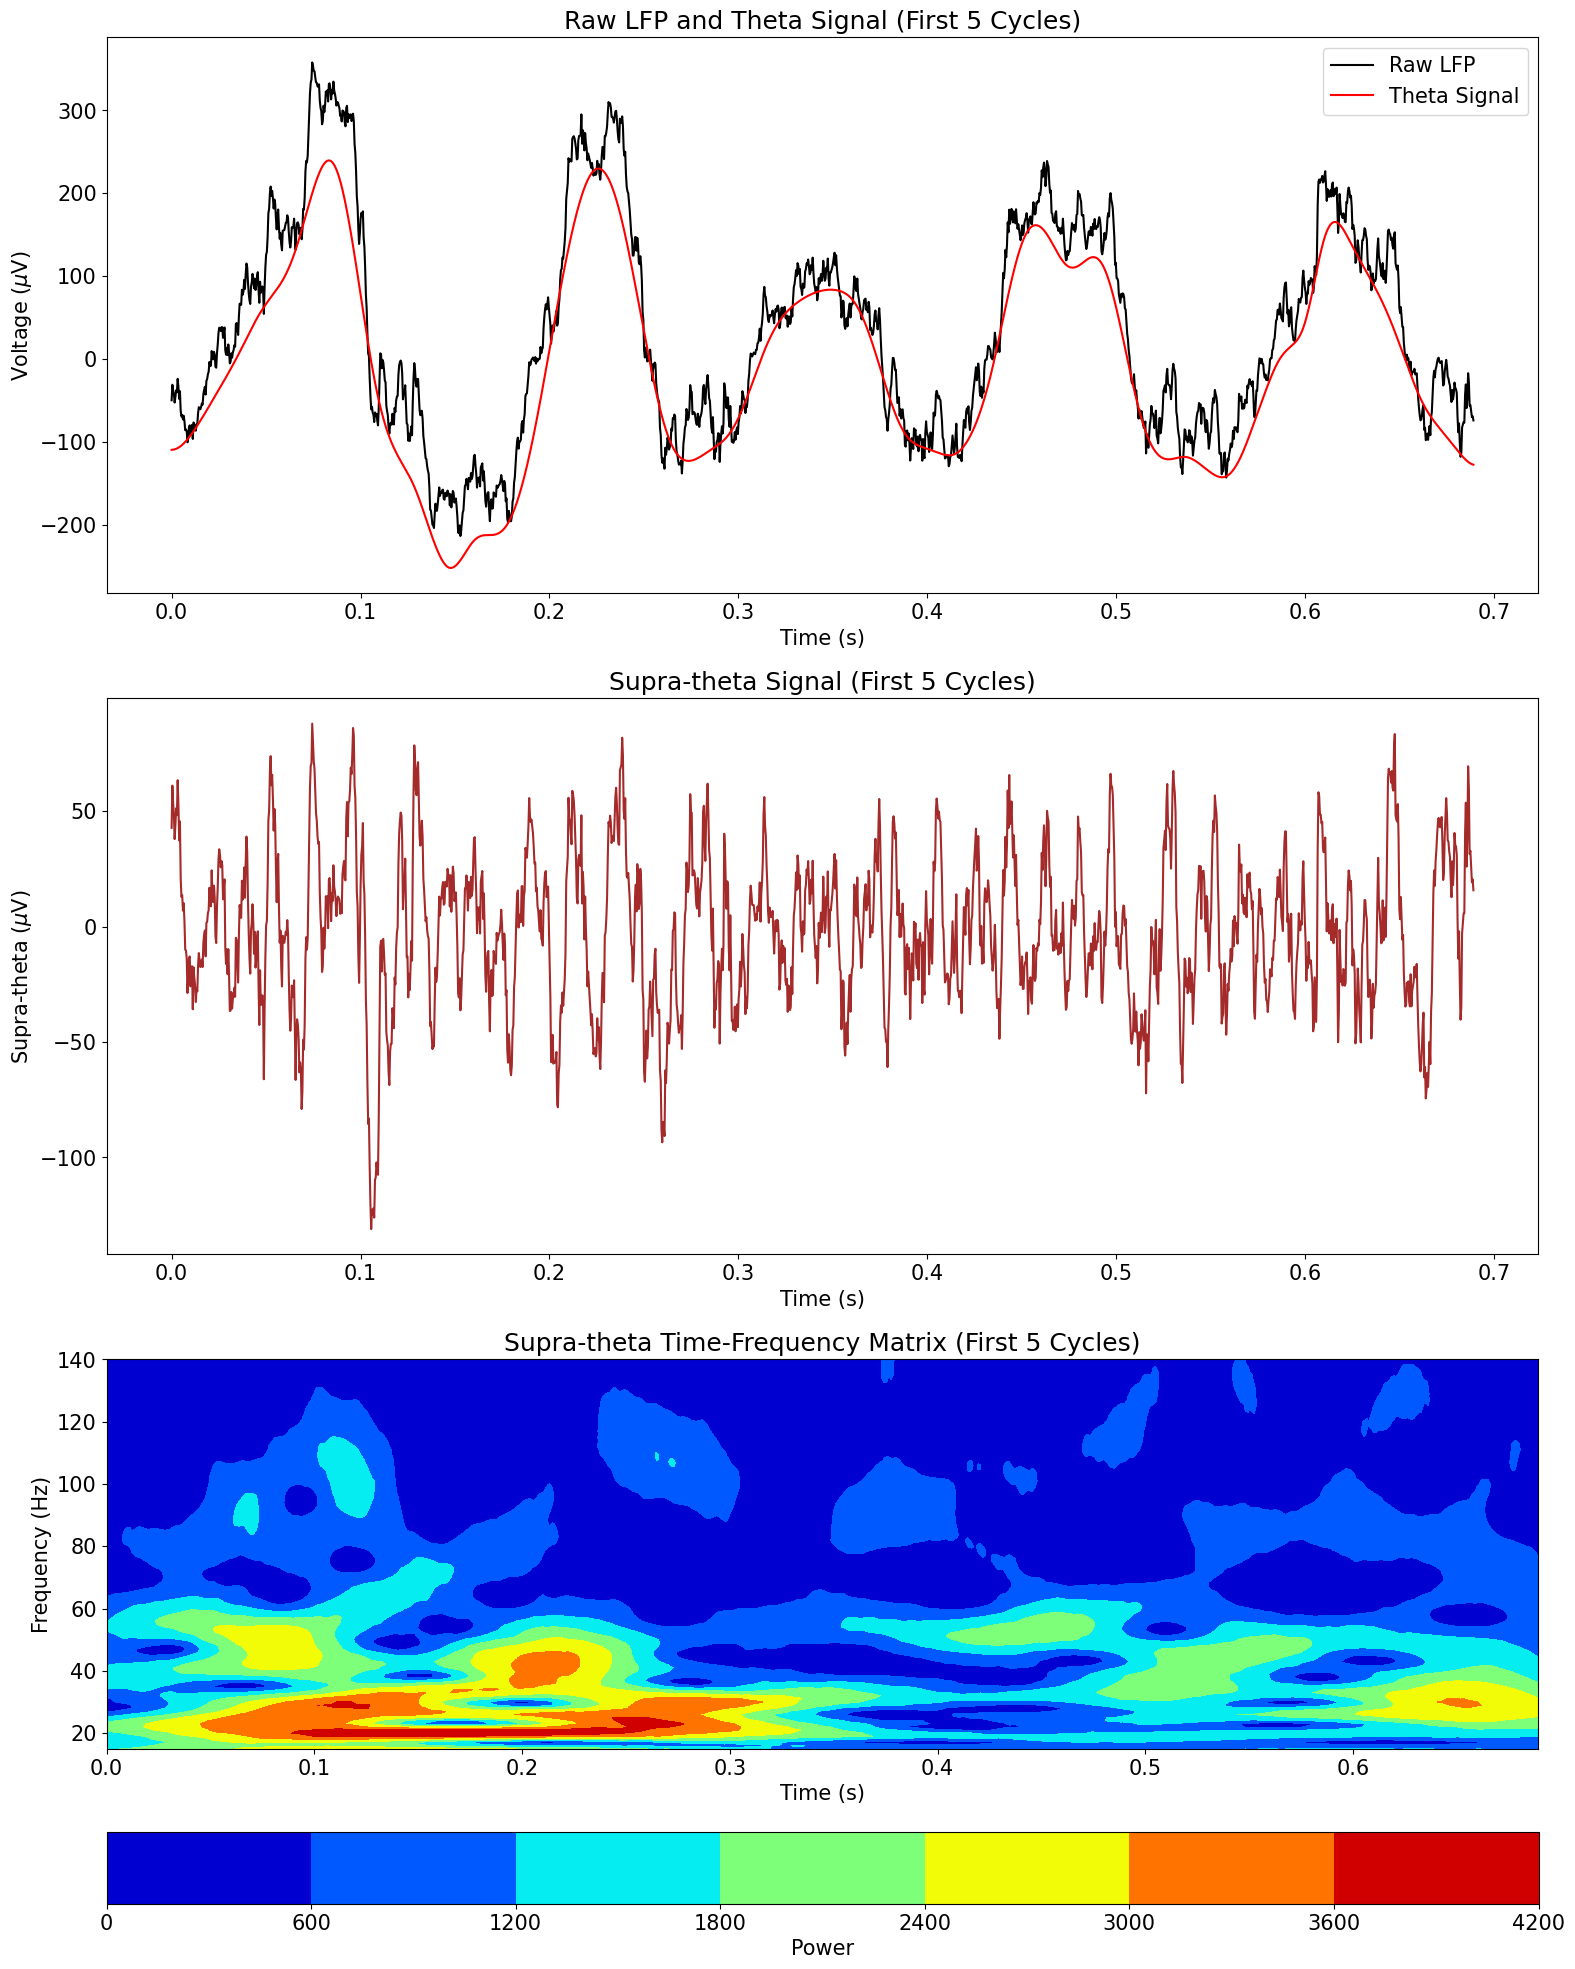

In [66]:
fig, axs = plt.subplots(3, 1, figsize=(16, 20))
plt.rcParams.update({'font.size': 15})

axs[0].plot(time_vector, lfp_signal_5_cycles, color='black', label='Raw LFP')
axs[0].plot(time_vector, theta_signal_5_cycles, color='red', label='Theta Signal')
axs[0].set_ylabel(r'Voltage ($\mu$V)')
axs[0].set_title('Raw LFP and Theta Signal (First 5 Cycles)')
axs[0].set_xlabel('Time (s)')
axs[0].legend(loc='upper right')

axs[1].plot(time_vector, supra_theta_signal_5_cycles, color='brown')
axs[1].set_ylabel(r'Supra-theta ($\mu$V)')
axs[1].set_title('Supra-theta Signal (First 5 Cycles)')
axs[1].set_xlabel('Time (s)')

im = axs[2].contourf(np.linspace(0, len(supra_theta_signal_5_cycles) / s_rate, supra_theta_wt_5_cycles.shape[1]),
                     frequencies, supra_theta_wt_5_cycles, cmap='jet')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Frequency (Hz)')
axs[2].set_title('Supra-theta Time-Frequency Matrix (First 5 Cycles)')

cbar = plt.colorbar(im, ax=axs[2], orientation='horizontal')
cbar.set_label('Power')

plt.tight_layout()
plt.show()

In [67]:
import random
start, end = rem_dict['REM 1']['start-end']
signal = lfp[start:end]

# Extract IMFs and Mask Frequencies using EMD
imf, mask_freq = emd.sift.iterated_mask_sift(signal, mask_0='zc', sample_rate=s_rate, ret_mask_freq=True)

# Split into sub-theta, theta, and supra-theta components
theta_range = (5, 12)  # Theta range in Hz
sub_theta, theta, supra_theta = tg_split(mask_freq, theta_range)

# Generate the theta and supra-theta signals
theta_sig = np.sum(imf.T[theta], axis=0)
supra_theta_sig = np.sum(imf.T[supra_theta], axis=0)

# Get the first REM cycles
rem_cycles = rem_dict['REM 1']['Cycles']

# Randomly select 4 cycles
random_cycles = random.sample(list(rem_cycles), 4)

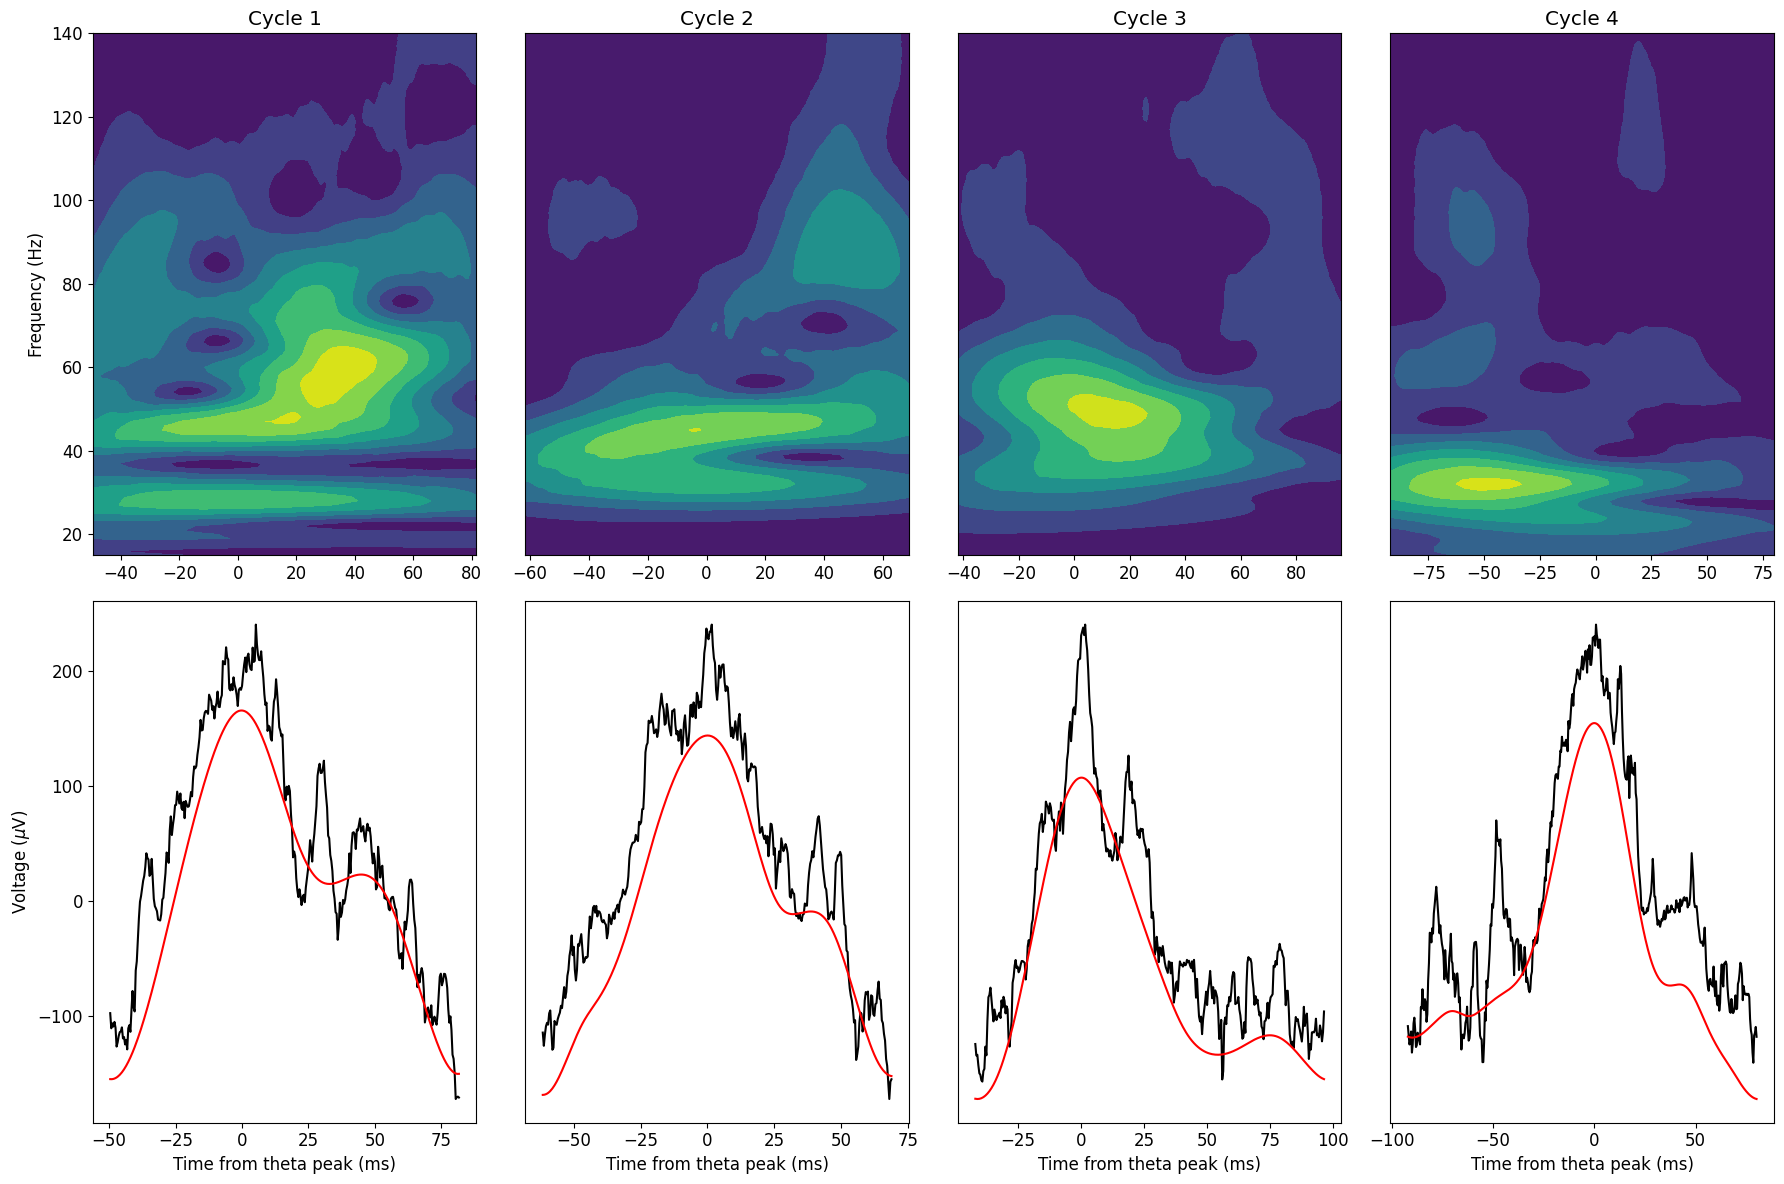

In [70]:
# Initialize the figure
fig, axs = plt.subplots(2, 4, figsize=(18, 12))
plt.rcParams.update({'font.size': 12})

# Loop through the selected cycles
for i, cycle in enumerate(random_cycles):
    # Extract the relevant indices
    cycle_start = int(cycle[0] - start)
    cycle_end = int(cycle[-1] - start)

    # Slice the signal, theta signal, and supra-theta signal for the cycle
    lfp_signal_cycle = signal[cycle_start:cycle_end]
    theta_signal_cycle = theta_sig[cycle_start:cycle_end]
    supra_theta_signal_cycle = supra_theta_sig[cycle_start:cycle_end]

    # Identify the peak index within the cycle
    peak_index = np.argmax(theta_signal_cycle)  # Find the index of the maximum value (peak) in the theta signal

    # Calculate the time vector relative to the peak
    time_vector = (np.arange(len(lfp_signal_cycle)) - peak_index) / s_rate * 1000  # Convert to milliseconds

    # Compute the wavelet transform (time-frequency matrix) for the supra-theta signal for this cycle
    supra_theta_wt_cycle = morlet_wt(supra_theta_signal_cycle, s_rate, frequencies, mode='amplitude')

    # Plot the supra-theta time-frequency matrix
    im = axs[0, i].contourf(time_vector, frequencies, supra_theta_wt_cycle, cmap='viridis')
    axs[0, i].set_title(f'Cycle {i+1}')
    if i == 0:
        axs[0, i].set_ylabel('Frequency (Hz)')
    else:
        axs[0, i].set_yticks([])  # Remove y-axis ticks for clarity

    # Plot the raw LFP signal and the theta signal for the cycle
    axs[1, i].plot(time_vector, lfp_signal_cycle, color='black', label='Raw LFP')
    axs[1, i].plot(time_vector, theta_signal_cycle, color='red', label='Theta Signal')
    axs[1, i].set_xlabel('Time from theta peak (ms)')
    if i == 0:
        axs[1, i].set_ylabel('Voltage ($\mu$V)')
    else:
        axs[1, i].set_yticks([])  # Remove y-axis ticks for clarity

# Adjust layout
plt.tight_layout()
plt.show()

In [71]:
rem_cycles[1]

array([2350526, 2350656, 2350722, 2350789, 2350838])

In [72]:
FPP_cycles.shape

(945, 126, 19)

In [73]:
num_cycles = 15  # Number of cycles to plot (3 rows x 5 columns)
random_indices = np.random.choice(FPP_cycles.shape[0], num_cycles, replace=False)

Text(0.5, 1.0, 'Cycle 2')

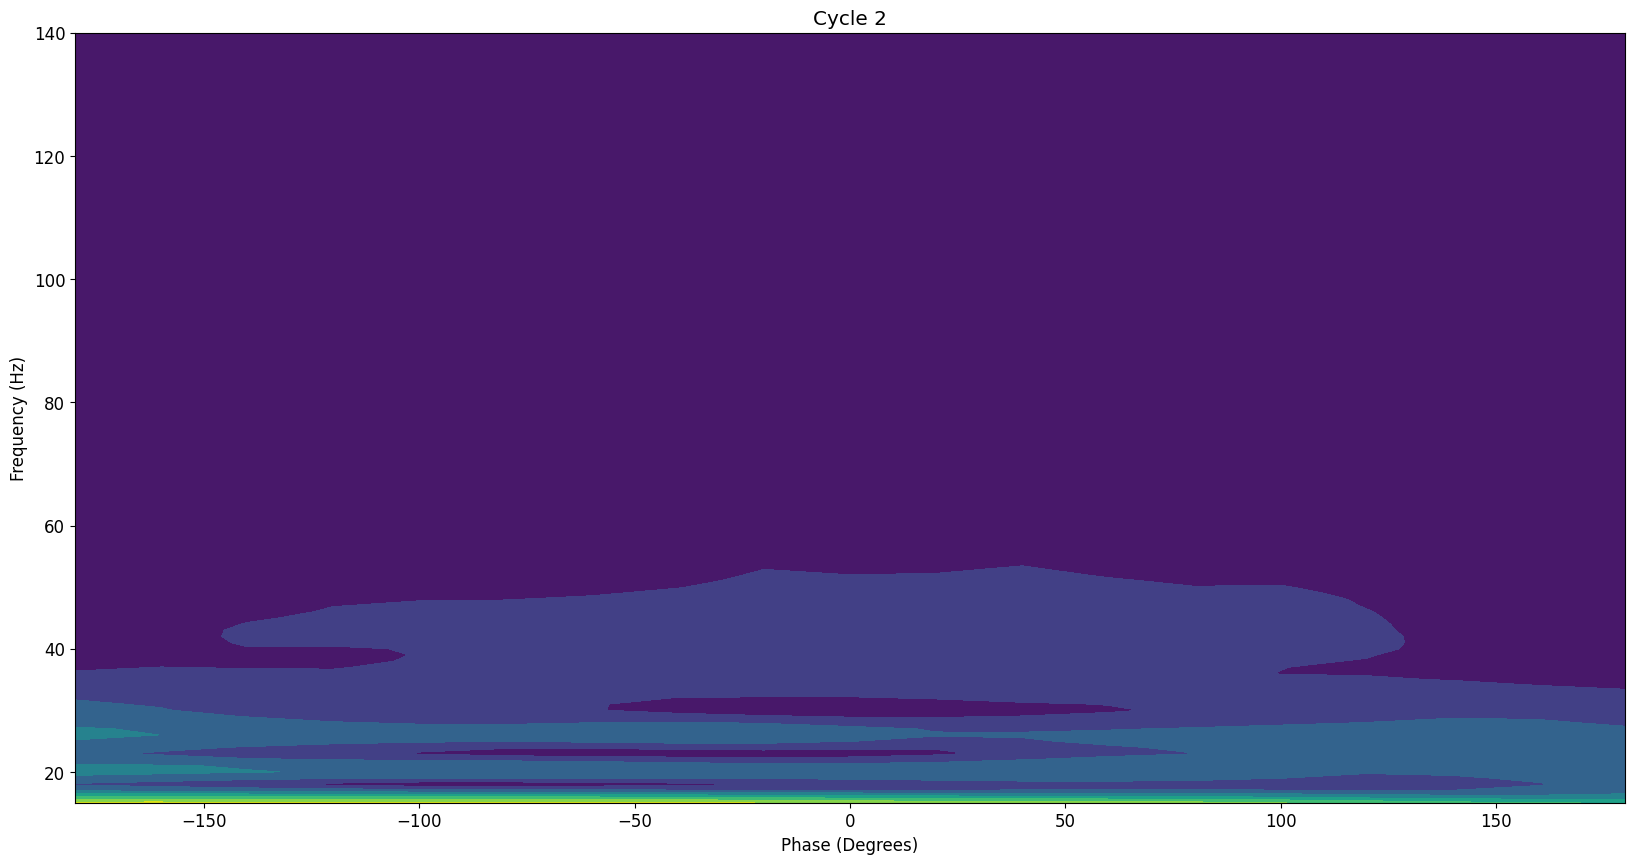

In [75]:
plt.figure(figsize=(20,10))
plt.contourf(angles, frequencies, FPP_cycles[1], cmap='viridis')
plt.xlabel('Phase (Degrees)')
plt.ylabel('Frequency (Hz)')
plt.title('Cycle 2')

# plt.rcParams.update({'font.size': 15})
# ax[0].contourf(angles,frequencies,FPP_cycles[0])
# ax[0].set_xlabel(r'Phase (Degrees)')
# ax[0].set_ylabel(r'Frequency (Hz)')
# ax[0].set_title('Cycle 1')
# ax[1].contourf(angles,frequencies,FPP_cycles[1])
# ax[1].set_xlabel(r'Phase (Degrees)')
# ax[1].set_ylabel(r'Frequency (Hz)')
# ax[1].set_title('Cycle 2')